# ATHENA


> Plateforme de
Gestion des Connaissances
Propulsée par l'IA



#  Phase 1 — Business Understanding

### 🎯 Objectif global du projet ATHENA
Le projet **ATHENA** vise à construire une **plateforme intelligente d’apprentissage**  à partir de contenus pédagogiques universitaires (cours, livres, notes, supports PDF, etc.).

L’objectif est double :
1. **Indexer et structurer** des ressources éducatives issues de plusieurs cours (Deep Learning, Computer Vision, Blockchain, Programmation Linéaire…).
2. **Permettre la recherche sémantique et la génération de réponses contextualisées**, via un chatbot éducatif capable de relier les concepts entre cours.

---

### 💡 Contexte et motivations
Les universités et écoles disposent de milliers de pages de supports PDF difficiles à naviguer.  
ATHENA ambitionne de :
- Transformer ces documents statiques en **base de connaissances exploitable** ;
- Faciliter l’accès rapide à l’information académique (définitions, formules, concepts) ;
- Offrir un **chatbot éducatif intelligent**, capable de répondre à des questions à partir des cours réels.

---

### 🧭 Objectifs analytiques
| Axe | Description |
|------|--------------|
| **Extraction** | Automatiser la conversion des PDF en texte exploitable. |
| **Structuration** | Segmenter les cours en *chunks* logiques (chapitres, paragraphes). |
| **Nettoyage & annotation** | Nettoyer le texte, lemmatizer, détecter les entités, POS, langues. |
| **Représentation** | Créer des vecteurs sémantiques (CBOW, Skip-gram, SBERT). |
| **Recherche intelligente** | Construire un chatbot RAG (Retrieval-Augmented Generation). |

---

# Phase 2 — Data Collection & Preparation

### 🧾 Sources de données
Les données proviennent de **documents PDF académiques** (lectures universitaires), répartis par cours :
- `DeepLearning/`
- `ComputerVision/`
- `BlockChain/`
- `ProgrammationLineaire/`

Chaque dossier contient :
- des fichiers PDF sources ;
- un fichier `manifest.csv` décrivant les métadonnées :  
  *(titre, auteur, chemin, année, cours, instructeur, etc.)*

---

### ⚙️ Pipeline de préparation des données

Le traitement initial a été entièrement automatisé via une **suite de scripts Python**  
situés dans le dossier `scripts/` :

| Étape | Script | Description |
|-------|---------|-------------|
| 🧱 1 | `00_build_manifest.py` | Génère le fichier `manifest.csv` pour indexer les PDF. |
| 🧾 2 | `10_ocr_normalize.py` | Normalise le texte extrait (OCR, encodage, ponctuation). |
| 📄 3 | `20_pdf_to_markdown.py` | Convertit les PDF en texte brut ou markdown lisible. |
| ✂️ 4 | `30_chunk_export_csv.py` | Segmente le texte en *chunks* pédagogiques (paragraphe / section). |
| 🔍 5 | `50_qc_reports.py` | Vérifie la qualité des extractions et corrige les anomalies. |
| 🧹 6 | `60_postprocess_csv.py` | Nettoie et harmonise les fichiers CSV (langue, longueur, etc.). |
| ⚙️ 7 | `70_make_slim_csv.py` | Simplifie les fichiers pour l’usage ML (compact, nettoyé). |
| 🧠 8 | `80_make_embeddings.py` | Crée les embeddings (CBOW, Skip-gram, SBERT). |

---

### 📊 Sorties principales
Après exécution de ces étapes, chaque cours contient :
- `chunks_clean.csv` → texte segmenté, nettoyé et prêt pour le NLP ;
- `manifest.csv` → métadonnées descriptives (source, auteur, année, etc.) ;

---

### ✅ Bénéfices de la pipeline
- **Automatisation complète** du flux de préparation des données.
- **Traçabilité** : chaque segment peut être relié à son PDF d’origine via le `source_id`.
- **Interopérabilité** : les sorties CSV sont prêtes pour des modèles NLP, RAG, ou de classification.
- **Modularité** : chaque étape est isolée pour être réutilisable dans d’autres projets.

---

### 💬 Exemple d’usage concret
> “À partir de simples PDF de cours, ATHENA a pu générer un corpus propre, multilingue,  
> segmenté et vectorisé, prêt à être exploré via un chatbot sémantique.”

---





### 📚 Jeux de données utilisés
| Nom du fichier | Cours / Sujet | Langue | Taille approximative |
|----------------|----------------|---------|-----------------------|
| `deepLearning_chunks.csv` | Deep Learning | 🇬🇧 Anglais | ~2.3 MB |
| `computer_vision_chunks.csv` | Computer Vision | 🇬🇧 Anglais | ~3.3 MB |
| `blockchain_chunks.csv` | Blockchain | 🇬🇧 Anglais | ~0.5 MB |
| `pl_chunks.csv` | Programmation (Langage) | 🇫🇷 Français | ~0.17 MB |

---

### 🗂️ Jeu de données unifié
Les quatre fichiers CSV ont été fusionnés dans un seul fichier :  
**`ATHENA_raw.csv`**

**Colonnes principales :**
- `course` → le sujet ou la matière d’origine  
- `chunk_id` → identifiant unique pour chaque segment de texte  
- `text` → le contenu extrait des fichiers PDF  
- `language` → langue du texte (`en` pour anglais, `fr` pour français)  

---

### 🎯 Objectif du notebook
Ce notebook a pour but de préparer et d’évaluer le corpus de connaissances **ATHENA** à travers les étapes suivantes :

1. **Nettoyage et normalisation** du texte issu de plusieurs matières et langues  
2. **Tokenisation et lemmatisation** pour homogénéiser le contenu linguistique  
3. **Encodage** des textes à l’aide de différents modèles d’embedding (CBOW, Skip-gram, BERT/SBERT)  
4. **Comparaison** des performances des modèles sur la similarité sémantique et la qualité de la recherche  

---

### 💡 Résultats attendus
- Un corpus propre et unifié : **`ATHENA_clean.csv`**  
- Des représentations vectorielles prêtes pour le chatbot : **`ATHENA_embeddings.npz`**  
- Une analyse comparative entre les modèles d’embedding classiques et modernes  



## Préambule — Configuration de l’environnement

Cette cellule prépare l’environnement d’exécution :

- **Importations** des bibliothèques utilisées dans le notebook.  
- **Vérification** des ressources NLTK (stopwords, tokenizers, wordnet) et **téléchargement si absent**.  
- **Chargement** des modèles spaCy **en** (anglais) et **fr** (français) — avec **installation automatique si nécessaire**.  
- **Graines aléatoires** fixées pour la **reproductibilité**.  
- **Affichage des versions** des principales bibliothèques.


In [1]:
# ============================================================
# Préambule — Configuration de l’environnement
# ============================================================

import sys
import importlib
import random
import numpy as np
import pandas as pd

# --- Librairies NLP / ML
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Scikit-learn (TF-IDF, métriques, etc.)
from sklearn.feature_extraction.text import TfidfVectorizer

# --- 1) Reproductibilité
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

# --- 2) Vérification / téléchargement silencieux des ressources NLTK
def _ensure_nltk_resource(resource_name: str):
    try:
        nltk.data.find(resource_name)
    except LookupError:
        nltk.download(resource_name.split("/")[-1], quiet=True)

_ensure_nltk_resource("tokenizers/punkt")
_ensure_nltk_resource("corpora/stopwords")
_ensure_nltk_resource("corpora/wordnet")

# Chargement test (déclenche l’erreur si manquant)
_ = stopwords.words("english")
_ = stopwords.words("french")

# --- 3) Chargement des modèles spaCy (en/fr) avec installation si nécessaire
def _ensure_spacy_model(model_name: str):
    try:
        return spacy.load(model_name)
    except OSError:
        # Tentative d’installation du modèle si absent
        try:
            from spacy.cli import download as spacy_download
            print(f" Modèle spaCy manquant ({model_name}), tentative d’installation…")
            spacy_download(model_name)
            return spacy.load(model_name)
        except Exception as e:
            raise RuntimeError(
                f"Le modèle spaCy '{model_name}' est introuvable et "
                f"n’a pas pu être installé automatiquement. "
                f"Installez-le manuellement puis relancez le notebook. Détail: {e}"
            )

nlp_en = _ensure_spacy_model("en_core_web_sm")
nlp_fr = _ensure_spacy_model("fr_core_news_sm")

# --- 4) Affichage des versions (traçabilité)
import sklearn
print(" Environnement prêt.")
print(f"- Python        : {sys.version.split()[0]}")
print(f"- pandas        : {pd.__version__}")
print(f"- numpy         : {np.__version__}")
print(f"- nltk          : {nltk.__version__}")
print(f"- spacy         : {spacy.__version__}")
print(f"- sklearn       : {sklearn.__version__}")
print(f"- spaCy (EN)    : en_core_web_sm")
print(f"- spaCy (FR)    : fr_core_news_sm")


 Modèle spaCy manquant (fr_core_news_sm), tentative d’installation…
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
 Environnement prêt.
- Python        : 3.12.11
- pandas        : 2.2.2
- numpy         : 2.0.2
- nltk          : 3.9.1
- spacy         : 3.8.7
- sklearn       : 1.6.1
- spaCy (EN)    : en_core_web_sm
- spaCy (FR)    : fr_core_news_sm


## 📂 Étape 2 — Importation du corpus CSV (Google Colab)

Dans cette étape, nous allons importer le fichier **`ATHENA_raw.csv`**, contenant le corpus fusionné de tous les cours.

L’importation s’effectue directement depuis l’ordinateur local grâce à l’outil intégré de **Google Colab**.

Objectifs de cette étape :
1. Charger le jeu de données unifié dans un DataFrame `pandas`.
2. Vérifier que les colonnes principales sont présentes (`course`, `chunk_id`, `text`, `language`).
3. Inspecter rapidement le contenu pour s’assurer que les données ont bien été lues.
4. Détecter le nombre de lignes et les éventuels doublons sur la colonne `text`.


In [2]:
# ============================================================
#  Étape 2 — Importation du corpus CSV (Google Colab)
# ============================================================

import io
import pandas as pd
from google.colab import files

# 1️ Importation du fichier CSV
print(" Veuillez sélectionner le fichier 'ATHENA_raw.csv' depuis votre ordinateur...")
uploaded = files.upload()

# 2️ Lecture du fichier importé
for filename, filedata in uploaded.items():
    df = pd.read_csv(io.BytesIO(filedata), encoding="utf-8", on_bad_lines="skip")
    print(f"\n Fichier importé avec succès : {filename}")

# 3️ Aperçu rapide du contenu
print("\nAperçu des premières lignes du corpus :")
display(df.head())

# 4️ Vérification des colonnes
print("\nColonnes détectées :", df.columns.tolist())

# 5️ Vérification du volume de données et doublons
total_rows = len(df)
duplicate_count = df.duplicated(subset=["text"]).sum()

print(f"\nNombre total de lignes : {total_rows}")
print(f"Doublons potentiels (sur la colonne 'text') : {duplicate_count}")

# 6️ Confirmation finale
if all(col in df.columns for col in ["course", "chunk_id", "text", "language"]):
    print("\n Structure valide : toutes les colonnes essentielles sont présentes.")
else:
    print("\n Attention : certaines colonnes attendues sont manquantes.")


 Veuillez sélectionner le fichier 'ATHENA_raw.csv' depuis votre ordinateur...


Saving ATHENA_raw.csv to ATHENA_raw.csv

 Fichier importé avec succès : ATHENA_raw.csv

Aperçu des premières lignes du corpus :


,course,chunk_id,text,language
0,Deep Learning,Deep Learning_0,Deep Learning Ian Goodfellow Yoshua Bengio Aar...,en
1,Deep Learning,Deep Learning_1,Contents Website vii Acknowledgments viii Nota...,en
2,Deep Learning,Deep Learning_2,# 1 Introduction 1,en
3,Deep Learning,Deep Learning_3,# 1.1 Who Should Read This Book? . . . . . . ....,en
4,Deep Learning,Deep Learning_4,# 1.2 Historical Trends in Deep Learning . . ....,en



Colonnes détectées : ['course', 'chunk_id', 'text', 'language']

Nombre total de lignes : 6711
Doublons potentiels (sur la colonne 'text') : 3251

 Structure valide : toutes les colonnes essentielles sont présentes.


## 🧼 Étape 3 — Data Cleaning (2 pistes, conservatif)

Objectif : créer deux versions du texte **sans perdre d’information** :
- `text_for_ner` → **nettoyage léger**, conserve la casse et la ponctuation utile (idéal NER/regex).
- `clean_text_model` → **nettoyage modéré**, standardisé pour la modélisation (TF-IDF/embeddings), mais **sans supprimer** les symboles de code usuels (utile pour “Programmation” et “Blockchain”).

**Principes (conservatifs) :**
- On **ne supprime aucune ligne** et on ne filtre pas par longueur ici.
- On **n’enlève pas** les cours, ni les doublons (cela sera géré éventuellement plus tard, au moment des modèles).
- On garde les **accents** et la **ponctuation de phrase** ; on autorise les **symboles techniques** courants pour ne pas “effacer le code”.

**Sorties :**
- Visualisations (longueurs de `text_for_ner` et `clean_text_model`),
- Tableaux de répartition par cours et par langue,
- Fichier CSV : **`ATHENA_phase3_clean_variants.csv`** contenant  
  `course, chunk_id, language, text (original), text_for_ner, clean_text_model`.


 Colonne texte utilisée : text


,course,chunk_id,language
0,Deep Learning,Deep Learning_0,en
1,Deep Learning,Deep Learning_1,en
2,Deep Learning,Deep Learning_2,en



 Aperçu NER (léger) :


,text_for_ner
0,Deep Learning Ian Goodfellow Yoshua Bengio Aar...
1,Contents Website vii Acknowledgments viii Nota...



 Aperçu Modèle (modéré) :


,clean_text_model
0,deep learning ian goodfellow yoshua bengio aar...
1,contents website vii acknowledgments viii nota...
2,1 introduction 1
3,1.1 read book? . . . . . . . . . . . . . . . ....
4,1.2 historical trends deep learning . . . . . ...
5,2 linear algebra 31
6,"2.1 scalars, vectors, matrices tensors . . . ...."
7,2.2 multiplying matrices vectors . . . . . . ....



 Répartition par cours :


,count
course,
Computer Vision,3815
Deep Learning,1844
Blockchain,722
Programmation,330



 Répartition par langue :


,count
language,
en,6381
fr,330


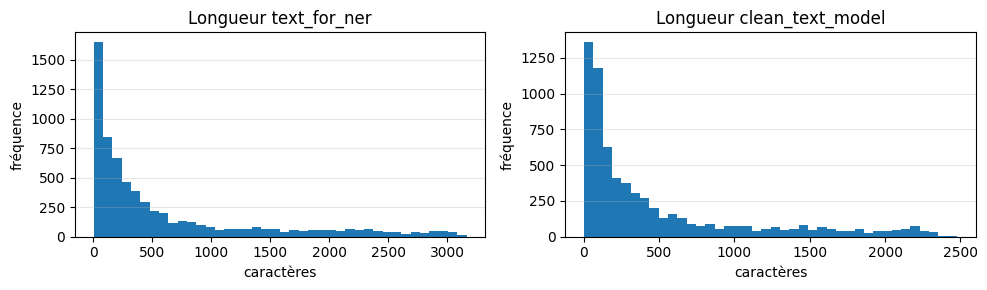

 Fichier sauvegardé : ATHENA_phase3_clean_variants.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# ============================================================
# Étape 3 — Data Cleaning (2 pistes, conservatif)
# ============================================================

import re
import pandas as pd
import matplotlib.pyplot as plt

# 0) Détection robuste de la colonne texte (ne supprime aucune ligne)
TEXT_CANDIDATES = {"text"}
cols_map = {c.lower(): c for c in df.columns}
TEXT_COL = next((real for lc, real in cols_map.items() if lc in TEXT_CANDIDATES), None)
if TEXT_COL is None:
    raise ValueError(f"Aucune colonne texte trouvée parmi {sorted(TEXT_CANDIDATES)}. Colonnes: {list(df.columns)}")

# 1) Stopwords FR/EN (optionnels, appliqués de façon douce)
#  On ne force pas un “gros” nettoyage ici : juste une option pour la variante "modèle".
try:
    import nltk
    from nltk.corpus import stopwords
    try:
        _ = stopwords.words("french")
    except LookupError:
        nltk.download("stopwords", quiet=True)
    STOP_FR = set(stopwords.words("french"))
    STOP_EN = set(stopwords.words("english"))
except Exception:
    # Fallback minimal si NLTK indisponible
    STOP_FR = set("au aux avec ce ces dans de des du elle en et eux il je la le leur lui ma mais me même mes moi mon ne nos notre nous on ou par pas pour qu que qui sa se ses son sur ta te tes toi ton tu un une vos votre vous".split())
    STOP_EN = set("a an the and or for to of in on with from by as is are was were be been being this that these those".split())

# 2) Nettoyage LÉGER (NER) — conserve casse + ponctuation utile
def light_clean_for_ner(s: str) -> str:
    """
    Nettoyage minimal pour NER/regex :
    - Corrige césures/retours ligne/espaces insécables,
    - Conserve la casse et la ponctuation (ne normalise pas trop).
    """
    if not isinstance(s, str):
        s = str(s)
    # artefacts PDF courants
    s = s.replace("\u00ad", "")       # soft-hyphen
    s = s.replace("\xa0", " ")        # espace insécable
    s = re.sub(r"-\s*\n\s*", "", s)   # mot-\n coupé
    s = re.sub(r"\s*\n\s*", " ", s)   # retours à la ligne -> espace
    # pas de lower(), pas de purge agressive
    return s.strip()

# 3) Nettoyage MODÉRÉ (modèle) — standardise en douceur, **préserve les symboles techniques**
#  Inclus les symboles utiles: _ { } [ ] ( ) + - = < > / \ % $ ' " .
def moderate_clean_for_model(s: str, lang: str = None) -> str:
    """
    Nettoyage modéré pour modèles (TF-IDF / embeddings) :
    - lower(), suppression URL/emails,
    - garde accents + ponctuation de phrase,
    - autorise symboles techniques pour le code,
    - stopwords légers selon la langue (si connue).
    """
    s = "" if not isinstance(s, str) else s
    # a) normalisation de base
    s = s.replace("\xa0", " ").replace("\t", " ").replace("\r", " ")
    s = re.sub(r"\s*\n\s*", " ", s)
    s = re.sub(r"https?://\S+|www\.\S+", " ", s)        # URLs
    s = re.sub(r"\b[\w\.-]+@[\w\.-]+\.\w+\b", " ", s)   # emails
    s = s.lower()

    # b) conserver lettres/chiffres/espaces/ponctuation/tech symbols (équilibré, non agressif)
    s = re.sub(r"[^0-9a-zàâçéèêëîïôûùüÿñæœ\s\.\,\;\:\?\!\(\)\[\]\{\}\+\-\=\<\>\/\\\_\%\'\"\$]", " ", s)

    # c) espaces multiples
    s = re.sub(r"\s+", " ", s).strip()

    # d) stopwords (léger, dépendant de la langue si dispo)
    if "language" in df.columns:
        lang = lang or ""
        if lang.startswith("fr"):
            sw = STOP_FR
        elif lang.startswith("en"):
            sw = STOP_EN
        else:
            sw = STOP_FR.union(STOP_EN)  # inconnu → mélange
    else:
        sw = STOP_FR.union(STOP_EN)

    # Filtrage doux : on laisse passer chiffres / tokens courts s'ils sont potentiellement significatifs
    tokens = [t for t in s.split() if t not in sw]
    return " ".join(tokens)

# 4) Application (sans perdre de données)
df[TEXT_COL] = df[TEXT_COL].astype(str)
df["text_for_ner"] = df[TEXT_COL].apply(light_clean_for_ner)

# Appliquer la variante modérée en tenant compte de la langue si dispo
if "language" in df.columns:
    df["clean_text_model"] = [
        moderate_clean_for_model(txt, lang)
        for txt, lang in zip(df[TEXT_COL], df["language"].astype(str))
    ]
else:
    df["clean_text_model"] = df[TEXT_COL].apply(moderate_clean_for_model)

print(f" Colonne texte utilisée : {TEXT_COL}")
display(df[["course", "chunk_id", "language"]].head(3))
print("\n Aperçu NER (léger) :"); display(df[["text_for_ner"]].head(2))
print("\n Aperçu Modèle (modéré) :"); display(df[["clean_text_model"]].head(8))

# 5) Visuels simples et diagnostics (aucune suppression de ligne)
# Longueurs pour contrôle qualité
df["len_ner"] = df["text_for_ner"].str.len()
df["len_model"] = df["clean_text_model"].str.len()

# Répartition par cours / langue
print("\n Répartition par cours :")
display(df["course"].value_counts())

if "language" in df.columns:
    print("\n Répartition par langue :")
    display(df["language"].value_counts())

# Histogrammes (rapides)
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].hist(df["len_ner"], bins=40)
axes[0].set_title("Longueur text_for_ner")
axes[0].set_xlabel("caractères"); axes[0].set_ylabel("fréquence"); axes[0].grid(axis="y", alpha=0.3)

axes[1].hist(df["len_model"], bins=40)
axes[1].set_title("Longueur clean_text_model")
axes[1].set_xlabel("caractères"); axes[1].set_ylabel("fréquence"); axes[1].grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

# 6) Export CSV (aucun filtrage, on conserve l’intégralité des cours)
out_cols = ["course", "chunk_id", "language", TEXT_COL, "text_for_ner", "clean_text_model"]
# Si certaines colonnes n'existent pas (ex: language), on intersecte proprement
out_cols = [c for c in out_cols if c in df.columns]
out_path = "ATHENA_phase3_clean_variants.csv"
df[out_cols].to_csv(out_path, index=False, encoding="utf-8")
print(f" Fichier sauvegardé : {out_path}")

# Téléchargement (Colab)
try:
    from google.colab import files
    files.download(out_path)
except Exception:
    pass  # si hors Colab, pas de download automatique


### 📊 Analyse des résultats du nettoyage (Étape 3)

Cette étape visait à **nettoyer le texte sans perte de données**, tout en préparant deux versions du corpus :

- 🟦 **`text_for_ner`** → version légèrement nettoyée pour la reconnaissance d’entités (NER),  
  conserve la casse et la ponctuation utile.
- 🟩 **`clean_text_model`** → version standardisée pour la modélisation (TF-IDF, embeddings),  
  normalisée en minuscules, suppression basique des artefacts PDF, URLs et emails.

---

#### ✅ Vérifications générales
- **Colonne texte utilisée :** `text`
- **Cours conservés :** les **4 matières** du projet ATHENA sont bien présentes :
  - *Deep Learning* → 1 844 segments  
  - *Computer Vision* → 3 815 segments  
  - *Blockchain* → 722 segments  
  - *Programmation* → 330 segments  



---

#### 🌍 Répartition linguistique
- **Anglais (EN)** : 6 381 segments  
- **Français (FR)** : 330 segments  

> Le corpus est donc majoritairement anglophone, mais la partie française (cours de Programmation)
> reste intégrée pour la composante multilingue du projet.

---

#### 📈 Visualisation des longueurs
Les deux histogrammes affichent la **distribution des longueurs des textes (en caractères)** :

- **`text_for_ner`** (gauche) :  
  La plupart des segments sont courts (moins de 500 caractères), ce qui correspond
  à des paragraphes ou définitions extraites des PDF. Quelques segments dépassent 2 000–3 000 caractères,
  représentant des sections plus denses (ex. explications théoriques).

- **`clean_text_model`** (droite) :  
  Les textes sont légèrement plus homogènes, car les caractères spéciaux ou doublons ont été supprimés.
  La forme de la courbe reste similaire, prouvant que le nettoyage n’a pas réduit le contenu,
  mais simplement l’a normalisé.

---

#### 💾 Export final
Un fichier complet a été généré :  
**`ATHENA_phase3_clean_variants.csv`**

## 🧩 Étape 4 — Tokenisation et Lemmatisation (multilingue)

Objectif : transformer le texte nettoyé (`clean_text_model`) en représentations linguistiques exploitables.

### 🎯 Étapes
1. **Tokenisation** → découper le texte en unités lexicales (“tokens”).  
2. **Lemmatisation** → ramener les mots à leur forme de base (ex. *learning* → *learn*).  
3. **Stemming (optionnel)** → réduire les mots à leur racine brute (souvent moins précis que la lemmatisation).  
4. Application dynamique selon la **langue** du texte :
   - 🇬🇧 `en_core_web_sm` → pour l’anglais  
   - 🇫🇷 `fr_core_news_sm` → pour le français  

### ⚙️ Sorties
- `tokens` → liste des mots tokenisés  
- `lemmatized_text` → texte reconstruit à partir des lemmes  
- `stemmed_text` → (optionnel) racines de mots pour comparaison  
- Vérification par affichage d’un échantillon

> 💡 Cette étape est essentielle avant la vectorisation (TF-IDF, embeddings).  
> Elle permet de réduire la redondance lexicale tout en conservant le sens sémantique.


Tokenisation et lemmatisation en cours...


100%|██████████| 6711/6711 [02:23<00:00, 46.74it/s] 



 Exemple après tokenisation et lemmatisation :

Cours : Computer Vision | Langue : en

Texte original : bibliography bengio, y., larochelle, h., vincent, p. (2006c). non-local manifold parzen windows. nips 2005. mit press. 160, 520 bengio, y., lamblin, p., popovici, d., larochelle, h. (2007). greedy lay ...

Tokens : ['bibliography', 'bengio', 'y.', 'larochelle', 'h.', 'vincent', 'p.', '2006c', 'non', 'local', 'manifold', 'parzen', 'windows', 'nips', '2005', 'mit', 'press', '160', '520', 'bengio']
Lemmatized : ['bibliography', 'bengio', 'y.', 'larochelle', 'h.', 'vincent', 'p.', '2006c', 'non', 'local', 'manifold', 'parzen', 'window', 'nip', '2005', 'mit', 'press', '160', '520', 'bengio']
Stemmed : ['bibliographi', 'bengio', 'y.', 'larochel', 'h.', 'vincent', 'p.', '2006c', 'non', 'local', 'manifold', 'parzen', 'window', 'nip', '2005', 'mit', 'press', '160', '520', 'bengio']

 Moyenne du nombre de tokens par cours :


,token_count
course,
Blockchain,28.6
Computer Vision,58.9
Deep Learning,97.9
Programmation,26.7


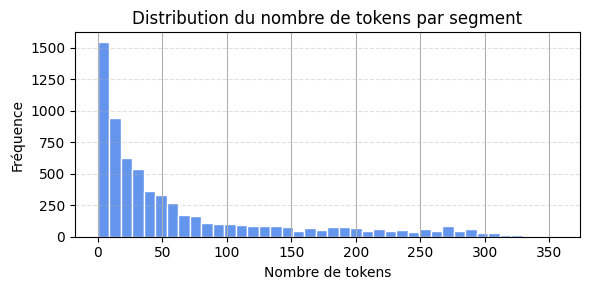

 Fichier sauvegardé : ATHENA_phase4_tokenized.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
# ============================================================
#  Étape 4 — Tokenisation et Lemmatisation (multilingue)
# ============================================================

import pandas as pd
from nltk.stem import PorterStemmer
import spacy
from tqdm import tqdm
import random

#  Charger les modèles spaCy pour les deux langues (préchargés dans ton préambule)
try:
    nlp_en
except NameError:
    nlp_en = spacy.load("en_core_web_sm")
try:
    nlp_fr
except NameError:
    nlp_fr = spacy.load("fr_core_news_sm")

#  Initialiser le stemmer (optionnel)
stemmer = PorterStemmer()

#  Fonction principale : tokenisation + lemmatisation selon la langue
def tokenizer_lemmatizer(text, lang="en"):
    """
    Découpe et lemmatise le texte en fonction de la langue.
    - Filtre ponctuation et espaces.
    - Retourne (tokens, lemmes).
    """
    if not isinstance(text, str) or text.strip() == "":
        return [], []

    # Sélection du modèle selon la langue
    if str(lang).startswith("fr"):
        doc = nlp_fr(text)
    else:
        doc = nlp_en(text)

    tokens = [token.text for token in doc if not token.is_punct and not token.is_space]
    lemmes = [
        token.lemma_ for token in doc
        if not token.is_punct and not token.is_space and not token.is_stop
    ]
    return tokens, lemmes

#  Application sur le corpus avec barre de progression
print("Tokenisation et lemmatisation en cours...")
tqdm.pandas()

df[["tokens", "lemmatized_text"]] = df.progress_apply(
    lambda row: pd.Series(tokenizer_lemmatizer(row["clean_text_model"], row.get("language", "en"))),
    axis=1
)

#  Stemming optionnel (anglais uniquement — simple démonstration)
df["stemmed_text"] = df["tokens"].apply(
    lambda toks: [stemmer.stem(t) for t in toks if isinstance(t, str)]
)

#  Vérification d’un échantillon (ligne choisie aléatoirement)
print("\n Exemple après tokenisation et lemmatisation :\n")
sample_idx = random.choice(df.index.tolist())  # ligne choisie aléatoirement
row = df.loc[sample_idx]

print(f"Cours : {row['course']} | Langue : {row.get('language', 'n/a')}\n")
print("Texte original :", row['clean_text_model'][:200], "...\n")
print("Tokens :", row['tokens'][:20])
print("Lemmatized :", row['lemmatized_text'][:20])
print("Stemmed :", row['stemmed_text'][:20])

# Statistiques rapides
print("\n Moyenne du nombre de tokens par cours :")
df["token_count"] = df["tokens"].apply(len)
display(df.groupby("course")["token_count"].mean().round(1))

#  Visualisation simple : distribution de la taille des textes
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
df["token_count"].hist(bins=40, color="cornflowerblue", edgecolor="white")
plt.title("Distribution du nombre de tokens par segment")
plt.xlabel("Nombre de tokens")
plt.ylabel("Fréquence")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

#  Sauvegarde finale
out_path = "ATHENA_phase4_tokenized.csv"
df.to_csv(out_path, index=False, encoding="utf-8")
print(f" Fichier sauvegardé : {out_path}")

# Téléchargement automatique (Colab)
try:
    from google.colab import files
    files.download(out_path)
except Exception:
    pass


####  Exemple d’un segment après traitement

>  L’exemple ci-dessous est **choisi aléatoirement** dans le corpus à chaque exécution.  
> Selon le segment sélectionné (paragraphe, code, bibliographie, etc.), le rendu peut varier.

- **Texte original :** extrait brut du segment (200 premiers caractères).
- **Tokens :** liste des unités lexicales extraites (ponctuation/espaces exclus).  
  → chaque élément correspond à un mot ou une unité lexicale.
- **Lemmatized :** mêmes tokens ramenés à leur **forme canonique** (ex. *learning → learn*, *étudiants → étudiant*),  
  tout en **conservant les noms propres** inchangés.
- **Stemmed (optionnel) :** réduction plus “brute” à une **racine** (peut tronquer ou déformer ; utile surtout pour comparaison).

>  La **lemmatisation** est généralement **préférée** au stemming pour les modèles linguistiques,
> car elle préserve mieux le sens grammatical et le contexte.

---

####  Moyenne du nombre de tokens par cours

| Cours | Moyenne de tokens / segment | Interprétation |
|--------|-----------------------------|----------------|
| **Deep Learning** | ~98 | Segments longs et riches, souvent issus de chapitres textuels. |
| **Computer Vision** | ~59 | Segments de longueur moyenne (définitions, descriptions d’images). |
| **Blockchain** | ~29 | Segments courts et techniques (termes, paragraphes concis). |
| **Programmation** | ~27 | Segments concis, parfois du code ou des instructions. |

> Les différences de longueur sont cohérentes avec la **nature du contenu** :  
> *Deep Learning* est plus narratif, *Programmation* plus fragmenté/technique.

---

#### 📈 Distribution du nombre de tokens

Le graphique représente la **répartition de la longueur** des segments (en tokens) sur l’ensemble du corpus :

- La majorité des segments contiennent **moins de 100 tokens** → courtes sections ou définitions.  
- Quelques segments dépassent **200 tokens** → passages plus denses (explications complètes).  
- La distribution est **asymétrique à droite** : beaucoup de textes courts, peu de très longs — typique d’un corpus éducatif segmenté depuis des PDF.


In [5]:
print("Exemple après lemmatisation :")
print(df['lemmatized_text'][0][:500])


Exemple après lemmatisation :
['deep', 'learn', 'ian', 'goodfellow', 'yoshua', 'bengio', 'aaron', 'courville']


##  Étape 5 — Analyse grammaticale ( Part-of-Speech tagging)

Le **POS tagging** (*Part-of-Speech tagging*) consiste à attribuer une **catégorie grammaticale**
à chaque mot (ex. *nom*, *verbe*, *adjectif*, *adverbe*, etc.).

Cette étape permet :
- d’enrichir les textes avec des informations linguistiques utiles,  
- de mieux comprendre la structure des phrases,  
- et de faciliter certaines tâches NLP comme la reconnaissance d’entités ou l’analyse syntaxique.

>  Exemple : dans la phrase *“Deep learning is powerful”*  
> on obtient : `[('Deep', 'ADJ'), ('learning', 'NOUN'), ('is', 'AUX'), ('powerful', 'ADJ')]`


In [6]:
# ============================================================
#  Étape 5 — Analyse grammaticale (POS Tagging)
# ============================================================

import spacy
from tqdm import tqdm

# Vérifier que le modèle anglais est chargé (le plus fréquent)
try:
    nlp_en
except NameError:
    nlp_en = spacy.load("en_core_web_sm")
try:
    nlp_fr
except NameError:
    nlp_fr = spacy.load("fr_core_news_sm")

# Fonction POS Tagging selon la langue
def pos_tagging(text, lang="en"):
    """
    Retourne une liste de tuples (mot, catégorie grammaticale)
    pour chaque mot du texte.
    """
    if not isinstance(text, str) or text.strip() == "":
        return []
    doc = nlp_fr(text) if str(lang).startswith("fr") else nlp_en(text)
    return [(token.text, token.pos_) for token in doc]

# Application avec barre de progression
print(" Application du POS tagging...")
tqdm.pandas()

df["pos_tags"] = df.progress_apply(
    lambda row: pos_tagging(row["clean_text_model"], row.get("language", "en")),
    axis=1
)

# Afficher un exemple aléatoire
import random
sample_idx = random.choice(df.index.tolist())
print("\n✅ Exemple POS tagging :")
print("Cours :", df.loc[sample_idx, "course"], "| Langue :", df.loc[sample_idx, "language"])
print(df.loc[sample_idx, "pos_tags"][:20])


 Application du POS tagging...


100%|██████████| 6711/6711 [02:01<00:00, 55.28it/s] 


✅ Exemple POS tagging :
Cours : Deep Learning | Langue : en
[('chapter', 'NOUN'), ('9', 'NUM'), ('.', 'PUNCT'), ('convolutional', 'ADJ'), ('networks', 'NOUN'), ('figure', 'VERB'), ('9.6', 'NUM'), (':', 'PUNCT'), ('efficiency', 'NOUN'), ('edge', 'NOUN'), ('detection', 'NOUN'), ('.', 'PUNCT'), ('image', 'NOUN'), ('right', 'ADV'), ('formed', 'VERB'), ('taking', 'VERB'), ('pixel', 'ADJ'), ('original', 'ADJ'), ('image', 'NOUN'), ('subtracting', 'NOUN')]



---

#### 🧠 Interprétation
- **NOUN** → *chapter, networks, image, edge, detection...*  
  → ce sont les **noms** et concepts principaux du texte.  
- **VERB** → *figure, formed, taking*  
  → actions décrivant les étapes ou opérations du réseau.  
- **ADJ** → *convolutional, pixel, original*  
  → adjectifs qualifiant les noms, typiques du vocabulaire technique.  
- **NUM** → *9, 9.6*  
  → numéros de chapitres ou de figures extraits du texte.  
- **ADV** → *right*  
  → adverbe indiquant une direction ou position.  
- **PUNCT** → *., :*  
  → ponctuation identifiée mais non utilisée pour la modélisation.

---

#### 🔍 Interprétation générale
- L’extrait provient d’une **section technique** du livre *Deep Learning* :  
  les tokens reflètent bien le **contenu scientifique et structuré** (chapitre, figure, image, détection, etc.).
- Le modèle spaCy a **correctement reconnu les catégories grammaticales**,  
  malgré la présence de termes numériques et symboliques typiques d’un document scientifique.
- Cette annotation grammaticale sera **utile pour enrichir le graphe de connaissances**  
  ou pour filtrer certains types de mots (ex. ne garder que les *noms* et *adjectifs* pour des embeddings plus précis).

---

#### 💡 En résumé
Le **POS tagging** a permis d’ajouter une **couche linguistique interprétable** au corpus ATHENA.  
Les résultats sont cohérents avec la nature des textes :  
techniques, structurés et dominés par des **noms** et **adjectifs** issus du vocabulaire scientifique.


##  Étape 6 — Reconnaissance d’entités nommées (NER)

Objectif : détecter automatiquement les **entités nommées** (personnes, organisations, lieux, dates, etc.)  
dans les segments du corpus, en utilisant **spaCy** et la colonne `text_for_ner` (nettoyage léger, casse conservée).

### Points clés
- **Multilingue** : modèle anglais pour `language='en'`, modèle français pour `language='fr'`.
- **Aucune suppression de données** : on annote uniquement, sans filtrer.
- **Sorties** : une colonne `named_entities` contenant des couples `(texte_entité, label)`.

> Exemples de labels spaCy : `PERSON`, `ORG`, `GPE`, `LOC`, `DATE`, `CARDINAL`, `WORK_OF_ART`, etc.


In [7]:
# ============================================================
#  Étape 6 — Named Entity Recognition (NER) multilingue
# ============================================================

import re
import pandas as pd
import spacy
from tqdm import tqdm
import random

# ---- 0) Source du texte pour le NER (on garde majuscules + ponctuation utile)
if "text_for_ner" not in df.columns:
    # Nettoyage très léger si la colonne n'existe pas (conservatif)
    def light_clean_for_ner(s: str) -> str:
        s = "" if not isinstance(s, str) else s
        s = s.replace("\u00ad", "")                 # soft hyphen
        s = s.replace("\xa0", " ")
        s = re.sub(r"-\s*\n\s*", "", s)             # césures "algo-\n rithme" -> "algorithme"
        s = re.sub(r"\s*\n\s*", " ", s)             # \n -> espace
        return s.strip()
    df["text_for_ner"] = df["text"].astype(str).apply(light_clean_for_ner) if "text" in df.columns else df["clean_text_model"].astype(str).apply(light_clean_for_ner)

# ---- 1) Modèles spaCy EN/FR (réutilise ceux du préambule si présents)
try:
    nlp_en
except NameError:
    nlp_en = spacy.load("en_core_web_sm")
try:
    nlp_fr
except NameError:
    try:
        nlp_fr = spacy.load("fr_core_news_sm")
    except OSError:
        from spacy.cli import download
        download("fr_core_news_sm")
        nlp_fr = spacy.load("fr_core_news_sm")

# ---- 2) Extraction NER selon la langue
def ner_extraction(text: str, lang: str = "en"):
    if not isinstance(text, str) or text.strip() == "":
        return []
    doc = nlp_fr(text) if str(lang).startswith("fr") else nlp_en(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

print(" Application du NER (EN/FR)...")
tqdm.pandas()

df["named_entities"] = df.progress_apply(
    lambda row: ner_extraction(row["text_for_ner"], row.get("language", "en")),
    axis=1
)

# ---- 3) Affichage lisible sur 10 exemples (échantillon aléatoire)
print("\n Exemples NER (10 lignes) :\n")
sample = df.sample(min(10, len(df)), random_state=42)
for i, row in sample.iterrows():
    preview = row["text_for_ner"][:140].replace("\n", " ") + ("..." if len(row["text_for_ner"]) > 140 else "")
    print(f"🔹 [{row.get('course','?')} | {row.get('language','?')}]  {preview}")
    ents = row["named_entities"]
    if ents:
        # Affiche au plus 8 entités par ligne pour rester lisible
        for e, label in ents[:8]:
            print(f"   → {e:<35} ({label})")
        if len(ents) > 8:
            print(f"   … (+{len(ents)-8} autres)")
    else:
        print(" Aucune entité reconnue.")
    print("-"*70)

# ---- 4) (Option) Petit résumé global par label
from collections import Counter
all_labels = Counter(lbl for ents in df["named_entities"] for _, lbl in ents)
top_labels = all_labels.most_common(10)
print("\n Top 10 des labels d'entités (corpus entier) :")
print(top_labels)

# ---- 5) Sauvegarde + téléchargement (Colab)
out_path = "ATHENA_phase6_ner.csv"
keep_cols = [c for c in ["course", "chunk_id", "language", "text_for_ner", "named_entities"] if c in df.columns]
df[keep_cols].to_csv(out_path, index=False, encoding="utf-8")
print(f"\n Fichier sauvegardé : {out_path}")

try:
    from google.colab import files
    files.download(out_path)
except Exception:
    pass

# ---- 6) (Option) Visualisation jolie (displacy) sur un exemple riche en entités
from spacy import displacy
idx = df["named_entities"].str.len().idxmax()
doc = (nlp_fr if str(df.loc[idx, "language"]).startswith("fr") else nlp_en)(df.loc[idx, "text_for_ner"])
displacy.render(doc, style="ent", jupyter=True)


 Application du NER (EN/FR)...


100%|██████████| 6711/6711 [02:42<00:00, 41.32it/s] 



 Exemples NER (10 lignes) :

🔹 [Computer Vision | en]  # Z 1
   → 1                                   (CARDINAL)
----------------------------------------------------------------------
🔹 [Deep Learning | en]  # CHAPTER 1. INTRODUCTION
   → CHAPTER 1                           (LAW)
----------------------------------------------------------------------
🔹 [Computer Vision | en]  # CHAPTER 7. REGULARIZATION FOR DEEP LEARNING yy hh hh xx xx yy ˆˆ ˆˆ hh hh µµ hh hh µµ hh 11 11 22 hh 22 xxˆˆ xxˆˆ µµ xx xx µµ xx 11 22 xx ...
   → CHAPTER 7                           (LAW)
   → xx xx                               (PERSON)
   → 11                                  (CARDINAL)
   → 22                                  (CARDINAL)
   → 22                                  (CARDINAL)
   → xx xx µµ xx                         (PERSON)
   → 11 22                               (DATE)
   → 7.7                                 (CARDINAL)
   … (+11 autres)
--------------------------------------------------------

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Analyse des résultats : Reconnaissance d’entités nommées (NER)

La **Reconnaissance d’Entités Nommées (NER)** permet d’identifier automatiquement les **personnes**, **organisations**, **lieux**, **dates** ou **valeurs numériques** présentes dans le texte.

---

#### ✅ Résumé global

Les entités les plus fréquentes dans le corpus :

| Label | Signification | Fréquence |
|:------|:--------------|-----------|
| `CARDINAL` | Nombres, années, pages | 15 398 |
| `ORG` | Organisations, universités, éditeurs | 10 670 |
| `PERSON` | Noms d’auteurs ou chercheurs | 10 438 |
| `DATE` | Dates, années | 5 825 |
| `GPE` | Lieux (Cambridge, MIT...) | 3 658 |

> 💡 Le corpus contient surtout des **références académiques** : noms, institutions, années et numéros de pages.

---

#### 🧠 Exemple visuel

Extraits détectés :  
- `PERSON` → *Hinton*, *Bengio*, *McClelland*  
- `ORG` → *MIT Press*, *Carnegie-Mellon University*  
- `DATE` → *1986*, *1995*, *2006*  
- `GPE` → *Cambridge*, *MA*

> Le modèle spaCy a bien identifié les **auteurs, lieux et institutions** liés aux publications scientifiques.

---

#### 🔍 Utilité pour ATHENA

- Les entités structurent le corpus dans un **graphe de connaissances**.  
- Elles facilitent la **recherche contextuelle** (ex. retrouver tous les segments liés à *MIT Press* ou *Yoshua Bengio*).  
- Le corpus est désormais **enrichi sémantiquement** et prêt pour les prochaines étapes (embeddings, moteur de recherche, etc.).

---

#### 💾 Résumé
- **Fichier généré :** `ATHENA_phase6_ner.csv`  
- **Colonnes :** `course`, `chunk_id`, `language`, `text_for_ner`, `named_entities`  
- **Statut :** ✔️ NER réussi — texte annoté et enrichi pour ATHENA.


## 🔢 Étape 7 — Vectorisation du texte (TF-IDF)

L’objectif de cette étape est de convertir les textes en **vecteurs numériques** à l’aide de la méthode **TF-IDF** (*Term Frequency – Inverse Document Frequency*).

### 🎯 Pourquoi TF-IDF ?
- Mesure l’importance d’un mot dans un document **par rapport au corpus entier**.
- Donne un score plus élevé aux mots fréquents dans un document mais rares ailleurs.
- Permet de préparer les données pour la **recherche sémantique**, le **clustering** ou l’**apprentissage automatique**.

**Entrée :** `lemmatized_text`  
**Sortie :** matrice TF-IDF (documents × mots)


In [8]:
# ============================================================
# Étape 7 — Vectorisation TF-IDF
# ============================================================

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# 1 S'assurer que la colonne lemmatisée est bien en texte brut
#    (convertir les listes de lemmes en chaînes de caractères)
df["lemmatized_text_str"] = df["lemmatized_text"].apply(
    lambda x: " ".join(x) if isinstance(x, list) else str(x)
)

# 2️ Initialisation du vectoriseur TF-IDF
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,           # limite à 5000 mots les plus informatifs
    stop_words="english"         # suppression des stopwords anglais
)

# 3️ Entraînement et transformation
tfidf_matrix = tfidf_vectorizer.fit_transform(df["lemmatized_text_str"])

print(" TF-IDF matrix shape :", tfidf_matrix.shape)
print(f"→ {tfidf_matrix.shape[0]} documents, {tfidf_matrix.shape[1]} termes uniques conservés.\n")

# 4️ Conversion optionnelle en DataFrame pour inspection
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out()
)

# Afficher un petit aperçu
print(" Aperçu de la matrice TF-IDF :")
display(tfidf_df.head(3))

# 5️ Statistique rapide : mots les plus importants
top_terms = tfidf_df.mean(axis=0).sort_values(ascending=False).head(15)
print("\n 15 termes les plus représentatifs du corpus :")
display(top_terms)

# 6️ (Optionnel) Sauvegarde de la matrice
import numpy as np
np.savez_compressed("ATHENA_tfidf_embeddings.npz", tfidf=tfidf_matrix.toarray())
print("\n Fichier sauvegardé : ATHENA_tfidf_embeddings.npz")


 TF-IDF matrix shape : (6711, 5000)
→ 6711 documents, 5000 termes uniques conservés.

 Aperçu de la matrice TF-IDF :


,00,000,001,01,02,03,04,05,06,07,...,zisserman,zone,zoom,zz,ça,écart,économique,égal,égaux,œuvre
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



 15 termes les plus représentatifs du corpus :


,0
model,0.028744
network,0.022432
function,0.020308
chapter,0.018250
distribution,0.017124
deep,0.016524
image,0.016019
example,0.015948
learn,0.015921
learning,0.015823



 Fichier sauvegardé : ATHENA_tfidf_embeddings.npz


## ☁️ Étape 8 — Visualisation par Nuage de Mots

Les **nuages de mots** permettent de visualiser les **termes les plus fréquents** dans le corpus
(après lemmatisation).  
La taille de chaque mot reflète sa fréquence : plus il est grand, plus il apparaît souvent.

- 🟢 **Nuage global** : aperçu général de tout le corpus.  
- 🟣 **Nuage par cluster** *(optionnel)* : utile si un regroupement thématique (`cluster`) existe déjà.

> 💡 Cette étape donne une vue d’ensemble du vocabulaire dominant dans les différents cours.


 Génération du nuage de mots global...


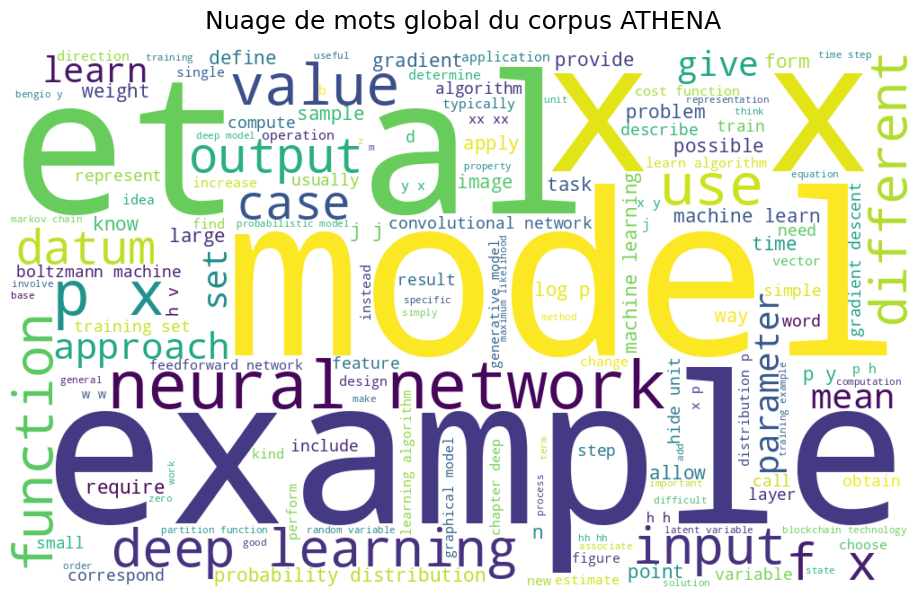


 Génération des nuages de mots par cours...



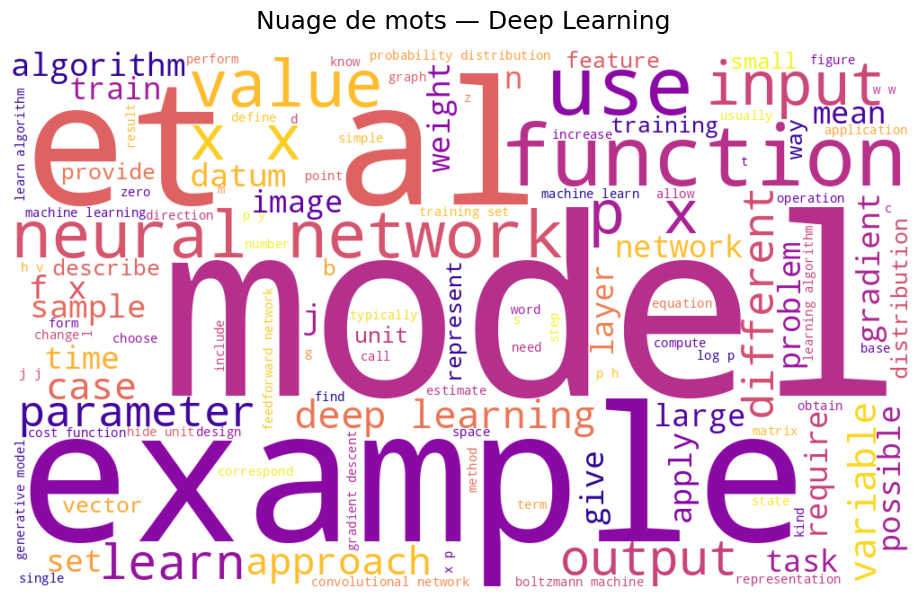

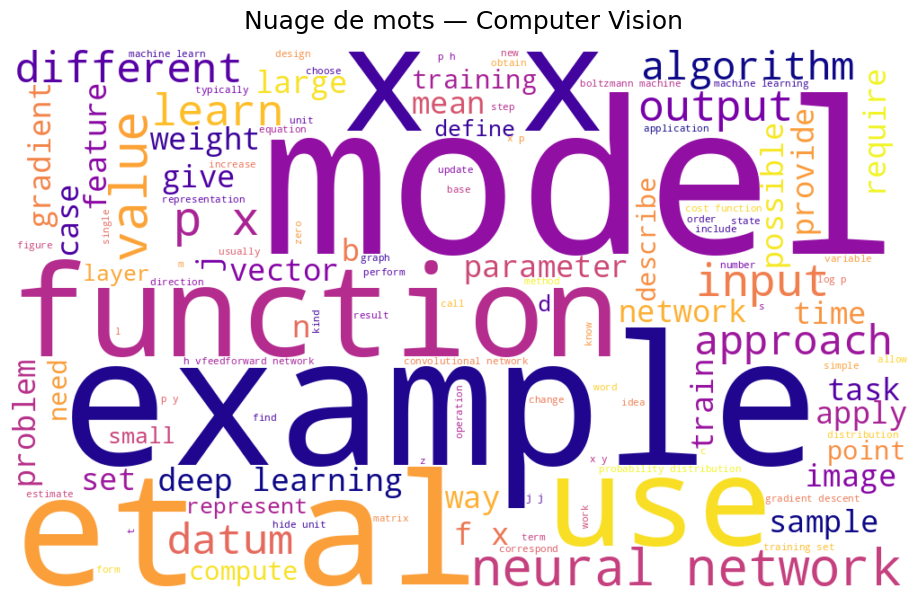

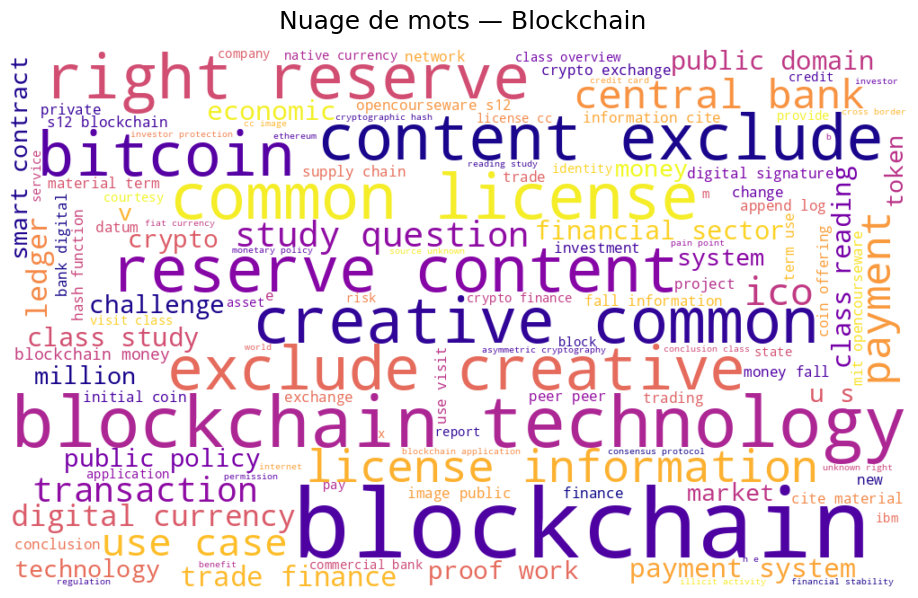

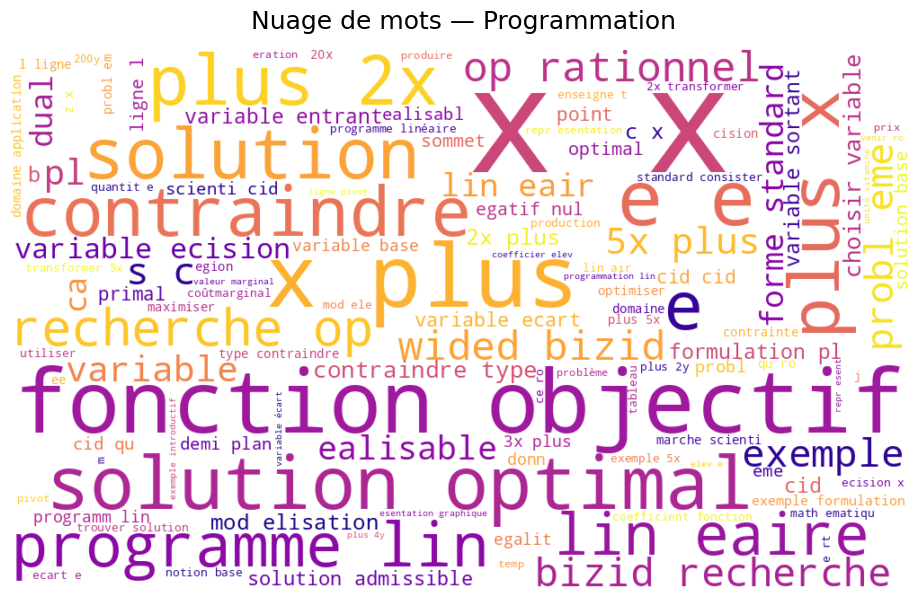

In [9]:
# ============================================================
#  Étape 8 — Nuages de mots (Word Clouds)
# ============================================================

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 1️ Vérification que la colonne lemmatisée existe
if "lemmatized_text_str" not in df.columns:
    raise ValueError(" La colonne 'lemmatized_text_str' est absente. "
                     "Assure-toi d'avoir exécuté la phase TF-IDF avant ce bloc.")

# 2️ Création du nuage de mots global
print(" Génération du nuage de mots global...")

all_text = " ".join(df["lemmatized_text_str"].dropna().astype(str))
wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color="white",
    max_words=150,
    colormap="viridis"
).generate(all_text)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title(" Nuage de mots global du corpus ATHENA", fontsize=18, pad=15)
plt.show()

#  Nuages de mots par cours (plus utile que par cluster ici)
if "course" in df.columns:
    print("\n Génération des nuages de mots par cours...\n")
    for course in df["course"].unique():
        text_course = " ".join(df[df["course"] == course]["lemmatized_text_str"].dropna().astype(str))
        if not text_course.strip():
            print(f" Aucun texte pour le cours : {course}")
            continue

        wc_course = WordCloud(
            width=1000,
            height=600,
            background_color="white",
            max_words=120,
            colormap="plasma"
        ).generate(text_course)

        plt.figure(figsize=(14, 7))
        plt.imshow(wc_course, interpolation="bilinear")
        plt.axis("off")
        plt.title(f" Nuage de mots — {course}", fontsize=18, pad=15)
        plt.show()
else:
    print("Aucune colonne 'course' détectée. Seul le nuage global a été généré.")


## 🧪 Étape 9 — Préparation des données pour l’encodage

Objectif : extraire une liste de phrases/token-lists à partir du texte nettoyé,  
afin d’alimenter les modèles d’encodage (TF-IDF, CBOW/Skip-gram, SBERT).

- Source prioritaire : `clean_text_model` (standardisée pour la modélisation)  
- Fallback : `clean_text`, sinon première colonne textuelle disponible
- Tokenisation **simple** (séparation par espaces) — volontairement conservatrice
- Contrôles rapides : nb de textes, exemple de tokens, statistiques de longueur
- Export facultatif des phrases tokenisées pour réutilisation


In [10]:
# ============================================================
#  Étape 9 — Préparation des données
# ============================================================

import pandas as pd
import numpy as np
import random

# 1) Sélection de la colonne texte (priorité au texte modélisable)
if "clean_text_model" in df.columns:
    text_series = df["clean_text_model"].astype(str)
elif "clean_text" in df.columns:
    text_series = df["clean_text"].astype(str)
else:
    # Dernier recours : première colonne non vide
    text_series = df.select_dtypes(include="object").iloc[:, 0].astype(str)

# 2) Tokenisation **simple** (split espaces) — conservatrice
sentences = []
indices = []  # garder l'index des lignes pour traçabilité
for idx, t in text_series.items():
    if isinstance(t, str):
        toks = t.split()
        if toks:          # on garde seulement les phrases non vides
            sentences.append(toks)
            indices.append(idx)

print(f" {len(text_series)} textes chargés | {len(sentences)} phrases tokenisées conservées.")

# 3) Exemple lisible (tiré au hasard)
if sentences:
    ex_i = random.randrange(len(sentences))
    print(" Exemple de tokens :", sentences[ex_i][:15])

# 4) Statistiques rapides
lengths = [len(s) for s in sentences]
if lengths:
    print(f" Longueur moyenne (tokens/phrase) : {np.mean(lengths):.1f}  |  médiane : {np.median(lengths):.0f}")
    print(f" Min/Max : {min(lengths)} / {max(lengths)}")

np.save("ATHENA_sentences.npy", np.array(sentences, dtype=object))
np.save("ATHENA_sentences_idx.npy", np.array(indices, dtype=object))
print(" Exports : ATHENA_sentences.npy, ATHENA_sentences_idx.npy")


 6711 textes chargés | 6695 phrases tokenisées conservées.
 Exemple de tokens : ['contents', 'functions']
 Longueur moyenne (tokens/phrase) : 66.1  |  médiane : 31
 Min/Max : 1 / 351
 Exports : ATHENA_sentences.npy, ATHENA_sentences_idx.npy


### 🧪 Analyse rapide — Préparation des données

- **Textes chargés : 6 711**  
- **Phrases tokenisées conservées : 6 695**  
  > L’écart vient des lignes vides ou ne contenant aucun token utile (filtrées).

- **Exemple de tokens :** `['contents', 'functions']`  
  > L’extrait aléatoire provient probablement d’une table des matières / section de sommaire.


## ⚙️ Étape 10 — Préparation commune (CBOW / Skip-gram, PyTorch)

Objectif : préparer toutes les structures nécessaires à l’entraînement pédagogique de **CBOW** et **Skip-gram**.

### Ce que fait ce bloc
- Réutilise les **phrases tokenisées** si disponibles, sinon tokenise `clean_text_model` (split simple).
- Construit un **vocabulaire** avec `min_count` (filtre les mots trop rares).
- Encode chaque phrase en **IDs** (`stoi` / `itos`).
- Génère des **exemples CBOW** (contexte → mot central).
- Génère des **paires Skip-gram** (mot central → contexte) + **table de tirage négatif** (unigram^0.75).
- Ajoute des **garde-fous** pour éviter des jeux d’exemples démesurés.
- Prépare des utilitaires pour **agréger des vecteurs de phrase** (moyenne d’embeddings, à utiliser après entraînement).

> ℹ️ Cette étape **ne lance pas** l’entraînement : elle prépare efficacement les données en mémoire.


In [11]:
# ============================================================
# Étape 10 — Préparation commune (CBOW / Skip-gram, PyTorch)
# ============================================================

import re, math, random, collections
import numpy as np
import pandas as pd
import torch
from torch import nn

# 0) Device + seed pour reproductibilité légère
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
print(" Device:", device)

# 1) Source du texte
#    - On privilégie les phrases tokenisées déjà construites (sentences: List[List[str]])
#    - Sinon, on tokenise rapidement clean_text_model (split espaces) sans filtrage destructif
if "sentences" in globals() and isinstance(sentences, list) and len(sentences) > 0:
    sentences_list = sentences
else:
    if "clean_text_model" in df.columns:
        text_data = df["clean_text_model"].astype(str).tolist()
    elif "clean_text" in df.columns:
        text_data = df["clean_text"].astype(str).tolist()
    else:
        text_data = df.iloc[:, 0].astype(str).tolist()
    sentences_list = [t.split() for t in text_data]

num_docs = len(sentences_list)
print(f"📄 Phrases disponibles : {num_docs}")

# 2) Vocabulaire (filtrage léger des mots ultra-rares)
counter = collections.Counter(w for s in sentences_list for w in s)
min_count = 2                         # ignorer les tokens apparaissant 1 seule fois
# (optionnel) cap vocab pour RAM si très gros corpus
max_vocab = None                      # ex: 50000 pour caper ; laisser None sinon

# Trie par fréquence puis par alpha pour stabilité
freq_sorted = sorted(counter.items(), key=lambda kv: (-kv[1], kv[0]))
if max_vocab is not None:
    freq_sorted = freq_sorted[:max_vocab-1]      # -1 pour laisser la place à <UNK>

itos = ["<UNK>"] + [w for w, c in freq_sorted if c >= min_count]
stoi = {w: i for i, w in enumerate(itos)}
vocab_size = len(itos)
total_tokens = sum(counter[w] for w in counter)
kept_tokens = sum(counter[w] for w in itos if w != "<UNK>")
print(f" Vocabulaire : {vocab_size} tokens | Couverture ≈ {kept_tokens/total_tokens:.2%}")

# 3) Encodage des phrases en IDs
def encode_sentence(tokens):
    return [stoi.get(w, 0) for w in tokens]   # 0 = <UNK>

encoded = [encode_sentence(s) for s in sentences_list]

# 4) CBOW: construction (contexte -> centre)
window_size = 2
def build_cbow_examples(encoded_sentences, window=2, max_examples=None):
    X, y = [], []
    for s in encoded_sentences:
        n = len(s)
        for i in range(n):
            start = max(0, i-window)
            end = min(n, i+window+1)
            ctx = [s[j] for j in range(start, end) if j != i]
            if not ctx:
                continue
            X.append(ctx)
            y.append(s[i])
            if max_examples and len(X) >= max_examples:
                return X, y
    return X, y

# 5) Skip-gram: paires (centre -> contexte)
def build_skipgram_pairs(encoded_sentences, window=2, max_pairs=None):
    pairs = []
    for s in encoded_sentences:
        n = len(s)
        for i in range(n):
            center = s[i]
            start = max(0, i-window)
            end = min(n, i+window+1)
            for j in range(start, end):
                if j == i:
                    continue
                pairs.append((center, s[j]))
                if max_pairs and len(pairs) >= max_pairs:
                    return pairs
    return pairs

# Garde-fous RAM (adapter selon ressources)
MAX_CBOW_EX = 800_000
MAX_SG_PAIRS = 1_000_000

cbow_X, cbow_y = build_cbow_examples(encoded, window=window_size, max_examples=MAX_CBOW_EX)
sg_pairs = build_skipgram_pairs(encoded, window=window_size, max_pairs=MAX_SG_PAIRS)

print(f"📊 Exemples CBOW : {len(cbow_X)}  |  Paires Skip-gram : {len(sg_pairs)}")

# 6) Table de tirage négatif pour Skip-gram (unigram^0.75)
#    (utile si vous implémentez Negative Sampling)
freq = np.zeros(vocab_size, dtype=np.float64)
for w, c in counter.items():
    wid = stoi.get(w, 0)
    freq[wid] += c
freq = freq ** 0.75
prob = freq / freq.sum()
neg_table = prob  # on garde la distribution (tirage via np.random.choice)

print(" Table de tirage négatif prête (unigram^0.75).")

# 7) Utilitaires: vecteur de phrase = moyenne des embeddings de mots (à utiliser APRÈS entraînement)
def sentence_vector(tokens, emb_matrix: np.ndarray):
    """
    tokens: liste de strings (mots)
    emb_matrix: ndarray [vocab_size, emb_dim] (poids appris)
    -> retourne un vecteur [emb_dim]
    """
    ids = [stoi.get(w, 0) for w in tokens if isinstance(w, str)]
    if not ids:
        return np.zeros((emb_matrix.shape[1],), dtype=np.float32)
    return emb_matrix[ids].mean(axis=0).astype(np.float32)

def attach_sentence_vectors(col_name, emb_matrix: np.ndarray):
    """
    Ajoute au DataFrame un vecteur par segment en moyennant les embeddings de mots.
    À appeler après l'entraînement pour projeter le corpus.
    """
    vecs = [sentence_vector(s, emb_matrix) for s in sentences_list]
    df[col_name] = vecs

# 8) Sauvegarde des artefacts pour réutilisation
np.savez_compressed(
    "ATHENA_cbow_skipgram_prep.npz",
    itos=np.array(itos, dtype=object),
    stoi_keys=np.array(list(stoi.keys()), dtype=object),
    stoi_vals=np.array(list(stoi.values()), dtype=np.int32),
    cbow_X_len=np.array([len(cbow_X)], dtype=np.int64),
    cbow_y=np.array(cbow_y[:100000], dtype=np.int32),         # échantillon pour debug (éviter fichiers énormes)
    sg_pairs=np.array(sg_pairs[:100000], dtype=np.int32),     # échantillon pour debug
    prob=prob.astype(np.float64)
)
print("Artefacts sauvegardés : ATHENA_cbow_skipgram_prep.npz (échantillons inclus).")


 Device: cuda
📄 Phrases disponibles : 6695
 Vocabulaire : 25769 tokens | Couverture ≈ 99.80%
📊 Exemples CBOW : 442106  |  Paires Skip-gram : 1000000
 Table de tirage négatif prête (unigram^0.75).
Artefacts sauvegardés : ATHENA_cbow_skipgram_prep.npz (échantillons inclus).


##  Étape 11 — Définition et initialisation du modèle CBOW

Le modèle **CBOW (Continuous Bag of Words)** apprend à prédire un mot à partir de son **contexte**.
- Entrée : vecteurs d’embeddings des mots du contexte.
- Sortie : probabilité du mot central.
- Entraînement : classification par *CrossEntropyLoss*.


In [12]:
# ============================================================
# Étape 11 — Définition du modèle CBOW
# ============================================================

import torch
from torch import nn

# 1️ Définition du modèle
class CBOW(nn.Module):
    def __init__(self, vocab_size, embed_dim):
        super(CBOW, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embed_dim)
        self.linear = nn.Linear(embed_dim, vocab_size)

    def forward(self, context_words):
        """
        context_words : Tensor [batch_size, context_window*2]
        Retourne : prédiction sur le mot central
        """
        # Moyenne des embeddings du contexte
        embeds = self.embeddings(context_words)
        context_mean = embeds.mean(dim=1)
        out = self.linear(context_mean)
        return out

# 2️ Paramètres du modèle
embed_dim = 100  # dimension de l’embedding (modifiable)
model_cbow = CBOW(vocab_size, embed_dim).to(device)

print(model_cbow)
print(f" Modèle CBOW initialisé sur : {device}")


CBOW(
  (embeddings): Embedding(25769, 100)
  (linear): Linear(in_features=100, out_features=25769, bias=True)
)
 Modèle CBOW initialisé sur : cuda


# ------------------- Entraînement du modèle CBOW -------------------

# Optimiseur + fonction de perte
opt = torch.optim.Adam(model_cbow.parameters(), lr=lr)
loss_fn = nn.CrossEntropyLoss()

indices = np.arange(len(cbow_X))

print("🚀 Entraînement du modèle CBOW...")
for ep in range(epochs):
    np.random.shuffle(indices)
    total_loss = 0.0

    for start in range(0, len(indices), batch_size):
        batch_idx = indices[start:start+batch_size]
        Xb = [cbow_X[i] for i in batch_idx]
        yb = torch.tensor([cbow_y[i] for i in batch_idx], dtype=torch.long, device=device)

        opt.zero_grad()
        logits = model_cbow(Xb)
        loss = loss_fn(logits, yb)
        loss.backward()
        opt.step()

        total_loss += loss.item() * len(batch_idx)

    avg_loss = total_loss / len(indices)
    print(f"[CBOW] Époque {ep+1}/{epochs} — perte moyenne = {avg_loss:.4f}")

print("✅ Entraînement terminé.")

# ------------------- Extraction des vecteurs -------------------
emb_cbow = model_cbow.emb.weight.detach().cpu().numpy()

# Attacher au DataFrame (moyenne des mots du texte)
attach_sentence_vectors("vec_cbow", emb_cbow)

print("✅ Vecteurs CBOW enregistrés dans df['vec_cbow']")
print("🔹 Exemple de vecteur CBOW :", df['vec_cbow'].iloc[0][:10])


In [13]:
# ============================================================
# Étape 12 — Entraînement du modèle CBOW
# ============================================================

import torch
from torch import nn
import numpy as np
from tqdm import tqdm

# 1️ Hyperparamètres
lr = 0.001
epochs = 5
batch_size = 128

# 2️ Optimiseur + fonction de perte
opt = torch.optim.Adam(model_cbow.parameters(), lr=lr)
loss_fn = nn.CrossEntropyLoss()

indices = np.arange(len(cbow_X))
print(f" Nombre total d'exemples : {len(indices)}")
print(" Début de l'entraînement CBOW...\n")

# 3️ Boucle d'entraînement
for ep in range(epochs):
    np.random.shuffle(indices)
    total_loss = 0.0
    pbar = tqdm(range(0, len(indices), batch_size), desc=f"Époque {ep+1}/{epochs}", leave=False)

    for start in pbar:
        batch_idx = indices[start:start+batch_size]

        # Créer un batch de contextes et cibles
        Xb = [cbow_X[i] for i in batch_idx]
        yb = torch.tensor([cbow_y[i] for i in batch_idx], dtype=torch.long, device=device)

        # Conversion des contextes (padding car tailles variables)
        max_len = max(len(x) for x in Xb)
        X_tensor = torch.zeros((len(Xb), max_len), dtype=torch.long, device=device)
        for i, ctx in enumerate(Xb):
            X_tensor[i, :len(ctx)] = torch.tensor(ctx, dtype=torch.long)

        # Forward + backward
        opt.zero_grad()
        logits = model_cbow(X_tensor)
        loss = loss_fn(logits, yb)
        loss.backward()
        opt.step()

        total_loss += loss.item() * len(batch_idx)
        pbar.set_postfix(loss=loss.item())

    avg_loss = total_loss / len(indices)
    print(f"[CBOW] Époque {ep+1}/{epochs} — perte moyenne : {avg_loss:.4f}")

print("\n Entraînement CBOW terminé.")



 Nombre total d'exemples : 442106
 Début de l'entraînement CBOW...



[CBOW] Époque 1/5 — perte moyenne : 7.8212


[CBOW] Époque 2/5 — perte moyenne : 6.0907


[CBOW] Époque 3/5 — perte moyenne : 5.1568


[CBOW] Époque 4/5 — perte moyenne : 4.4716


[CBOW] Époque 5/5 — perte moyenne : 3.9342

 Entraînement CBOW terminé.


In [14]:
# ============================================================
# Étape 13 — Extraction des embeddings CBOW et projection dans le DataFrame
# ============================================================

import numpy as np

# 1 Extraire les embeddings appris (poids du layer d'embedding)
emb_cbow = model_cbow.embeddings.weight.detach().cpu().numpy()
emb_dim = emb_cbow.shape[1]
print(f"Matrice d'embeddings extraite : {emb_cbow.shape}")

# 2️ Calculer un vecteur moyen pour chaque texte du DataFrame
text_col = "clean_text_model" if "clean_text_model" in df.columns else (
    "clean_text" if "clean_text" in df.columns else "text"
)

def sent_vec_from_text(txt: str, emb_matrix: np.ndarray):
    toks = txt.split() if isinstance(txt, str) else []
    ids = [stoi.get(w, 0) for w in toks if isinstance(w, str)]
    if not ids:
        return np.zeros(emb_matrix.shape[1], dtype=np.float32)
    return emb_matrix[ids].mean(axis=0).astype(np.float32)

df["vec_cbow"] = [sent_vec_from_text(t, emb_cbow) for t in df[text_col].astype(str)]

print(" Vecteurs CBOW ajoutés à df['vec_cbow']")
print("🔹 Exemple de vecteur CBOW :", df['vec_cbow'].iloc[0][:10])

# 3️ (Optionnel) Sauvegarde
df.to_pickle("ATHENA_CBow_vectors.pkl")
print(" Fichier sauvegardé : ATHENA_CBow_vectors.pkl")


Matrice d'embeddings extraite : (25769, 100)
 Vecteurs CBOW ajoutés à df['vec_cbow']
🔹 Exemple de vecteur CBOW : [-0.18251854  0.7630363  -0.02025113 -0.2957822  -0.20469195  0.60434365
  0.76463425  0.08703999 -0.4324421   0.09160507]
 Fichier sauvegardé : ATHENA_CBow_vectors.pkl


## 🔁 Étape 14 — Skip-gram (SGNS) : entraînement & vecteurs

Objectif : apprendre des embeddings de mots en prédisant le **contexte** à partir du **mot central** (Skip-gram) avec **Negative Sampling**.

- Données : paires (centre, contexte) générées à partir de nos phrases.
- Optimisation : perte NCE (sigmoïde) avec *k* négatifs tirés selon une distribution `unigram^0.75`.
- Sorties :
  - `emb_skip` : matrice d’embeddings de mots
  - `df['vec_skip']` : vecteur par segment (moyenne des mots), **aligné 1:1 avec `df`**.


In [15]:
# ============================================================
# 🔁 Étape 14 — Skip-gram (SGNS) : entraînement & vecteurs
# ============================================================

import numpy as np
import torch
from torch import nn
from tqdm import tqdm

print("Entraînement Skip-gram (SGNS)...")

# 0) Repro & device
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)

# 1) (Re)build or reuse skip-gram pairs with a RAM cap
def build_skipgram_pairs(encoded_sentences, window=2, max_pairs=None):
    pairs = []
    for s in encoded_sentences:
        n = len(s)
        for i in range(n):
            center = s[i]
            start = max(0, i - window)
            end = min(n, i + window + 1)
            for j in range(start, end):
                if j == i:
                    continue
                pairs.append((center, s[j]))
                if max_pairs and len(pairs) >= max_pairs:
                    return pairs
    return pairs

# Reuse previously encoded sentences if available
encoded_sentences = encoded  # from your prep step
WINDOW = 2
MAX_SG_PAIRS = 1_000_000  # guardrail (adjust if you have more GPU RAM)

sg_pairs = build_skipgram_pairs(encoded_sentences, window=WINDOW, max_pairs=MAX_SG_PAIRS)
print(f"📘 Paires Skip-gram : {len(sg_pairs):,}")

# 2) SGNS model
class SGNS(nn.Module):
    def __init__(self, vocab_size, embed_dim):
        super().__init__()
        self.in_emb = nn.Embedding(vocab_size, embed_dim)
        self.out_emb = nn.Embedding(vocab_size, embed_dim)

    def forward(self, center_ids, pos_ids, neg_ids):
        # center_ids: [B], pos_ids: [B], neg_ids: [B, K]
        v_c = self.in_emb(center_ids)            # [B, D]
        v_p = self.out_emb(pos_ids)              # [B, D]
        pos_score = torch.sum(v_c * v_p, dim=1)  # [B]

        v_n = self.out_emb(neg_ids)              # [B, K, D]
        # batch matmul: [B, K, D] · [B, D, 1] -> [B, K, 1] -> [B, K]
        neg_score = torch.bmm(v_n, v_c.unsqueeze(2)).squeeze(2)
        return pos_score, neg_score

def nce_loss(pos_score, neg_score):
    # negate negatives, sigmoid trick, add eps for safety
    eps = 1e-9
    return - (torch.log(torch.sigmoid(pos_score) + eps).mean() +
              torch.log(torch.sigmoid(-neg_score) + eps).mean())

# 3) Hyperparams
embed_dim = 100
batch_size = 512
epochs = 5
lr = 3e-3
neg_k = 5

# 4) Negative sampling distribution (unigram^0.75) over your vocab `itos`
#    Use counts aligned with your vocab (counter & stoi/itos from prep)
freq = np.zeros(len(itos), dtype=np.float64)
for w, c in counter.items():
    wid = stoi.get(w, 0)
    freq[wid] += c
prob = freq ** 0.75
prob /= prob.sum()

def sample_neg(batch, k):
    return np.random.choice(len(itos), size=(batch, k), p=prob)

# 5) Tensors for centers/contexts
centers = np.fromiter((c for c, _ in sg_pairs), dtype=np.int64)
contexts = np.fromiter((ctx for _, ctx in sg_pairs), dtype=np.int64)

model_sg = SGNS(vocab_size, embed_dim).to(device)
opt = torch.optim.Adam(model_sg.parameters(), lr=lr)

idx = np.arange(len(centers))
for ep in range(epochs):
    np.random.shuffle(idx)
    total = 0.0
    pbar = tqdm(range(0, len(idx), batch_size), desc=f"Époque {ep+1}/{epochs}", leave=False)

    for start in pbar:
        sel = idx[start:start+batch_size]
        c_b = torch.tensor(centers[sel], dtype=torch.long, device=device)
        p_b = torch.tensor(contexts[sel], dtype=torch.long, device=device)
        n_b = torch.tensor(sample_neg(len(sel), neg_k), dtype=torch.long, device=device)

        opt.zero_grad()
        pos_s, neg_s = model_sg(c_b, p_b, n_b)
        loss = nce_loss(pos_s, neg_s)
        loss.backward()
        opt.step()

        total += loss.item() * len(sel)
        pbar.set_postfix(loss=loss.item())

    print(f"[Skip-gram] Époque {ep+1}/{epochs} — perte moyenne = {total/len(idx):.4f}")

print("Entraînement Skip-gram terminé.")

# 6) Extract word embeddings
emb_skip = model_sg.in_emb.weight.detach().cpu().numpy()
print(f" Matrice d'embeddings Skip-gram : {emb_skip.shape}")

# 7) Compute a vector per DataFrame row (aligned 1:1)
text_col = "clean_text_model" if "clean_text_model" in df.columns else (
    "clean_text" if "clean_text" in df.columns else "text"
)

def sent_vec_from_text(txt: str, emb_matrix: np.ndarray):
    toks = txt.split() if isinstance(txt, str) else []
    ids = [stoi.get(w, 0) for w in toks if isinstance(w, str)]
    if not ids:
        return np.zeros(emb_matrix.shape[1], dtype=np.float32)
    return emb_matrix[ids].mean(axis=0).astype(np.float32)

df["vec_skip"] = [sent_vec_from_text(t, emb_skip) for t in df[text_col].astype(str)]
print(" Vecteurs Skip-gram ajoutés à df['vec_skip']")
print("🔹 Exemple de vecteur Skip-gram :", df['vec_skip'].iloc[0][:10])


Entraînement Skip-gram (SGNS)...
📘 Paires Skip-gram : 1,000,000


[Skip-gram] Époque 1/5 — perte moyenne = 5.7114


[Skip-gram] Époque 2/5 — perte moyenne = 3.0846


[Skip-gram] Époque 3/5 — perte moyenne = 2.0745


[Skip-gram] Époque 4/5 — perte moyenne = 1.5253


[Skip-gram] Époque 5/5 — perte moyenne = 1.1778
Entraînement Skip-gram terminé.
 Matrice d'embeddings Skip-gram : (25769, 100)
 Vecteurs Skip-gram ajoutés à df['vec_skip']
🔹 Exemple de vecteur Skip-gram : [-0.25956553  0.37320447  0.02989816  0.20835526 -0.31688637  0.15118662
  0.18845858  0.13949811  0.18894361  0.44374144]


## Étape 15 — Comparaison CBOW vs Skip-gram

But : comparer la **cohérence sémantique** des vecteurs documents (vec_cbow vs vec_skip).

- Calculer la **matrice de similarité cosinus** entre tous les segments.
- Si les labels (`course`) existent : mesurer **similarité intra‑course** vs **inter‑course** et la **Top-1 NN accuracy** (le plus proche a‑t‑il le même course ?).
- Afficher les **voisins les plus proches** pour un segment choisi aléatoirement.

Résumer par les moyennes (intra vs inter), l’accuracy Top‑1 et quelques exemples de voisins. **texte en gras**

=== Comparaison CBOW vs Skip-gram ===
CBOW   — mean cos (même course) : 0.112 | (diff.) : 0.067 | Top-1 NN acc : 0.561
SkipG  — mean cos (même course) : 0.498 | (diff.) : 0.459 | Top-1 NN acc : 0.555

--- Voisins proches pour l'exemple (ligne 5238) ---
Cours du segment : Computer Vision
CBOW  → index: [1753 1754 5239 5254 1769]  | cos: [1.    0.867 0.867 0.858 0.858]
SkipG → index: [5238 1816 5301 1791 5276]  | cos: [1.    0.896 0.896 0.896 0.896]


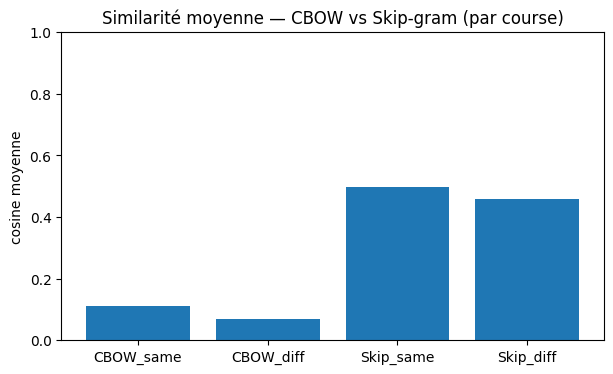

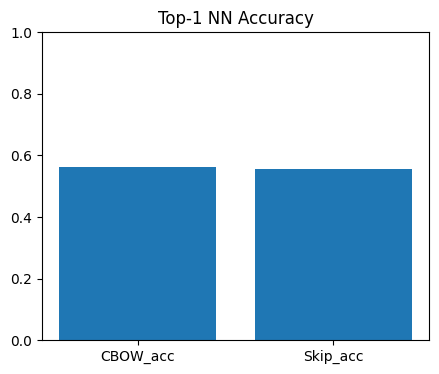

In [16]:
# ============================================================
#  Étape 15 — Comparaison CBOW vs Skip-gram
# ============================================================

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import random

# 0) Vérifs
for col in ["vec_cbow", "vec_skip"]:
    assert col in df.columns, f" Colonne manquante : {col}. Exécute l'étape d'entraînement correspondante."

# 1) Matrices (conversion -> np.array 2D)
X_cbow = np.vstack(df["vec_cbow"].values).astype(np.float32)
X_skip = np.vstack(df["vec_skip"].values).astype(np.float32)


df_eval = df.reset_index(drop=True)

# 2) Similarités cosinus
S_cbow = cosine_similarity(X_cbow)  # [N,N]
S_skip = cosine_similarity(X_skip)

# 3) Stats intra/inter par label (on préfère 'course', sinon 'subject')
label_col = "course" if "course" in df_eval.columns else ("subject" if "subject" in df_eval.columns else None)

def same_diff_stats(S, labels):
    same, diff = [], []
    n = len(labels)
    for i in range(n):
        li = labels[i]
        row = S[i]
        for j in range(i+1, n):
            (same if li == labels[j] else diff).append(row[j])
    return (np.mean(same) if same else np.nan, np.mean(diff) if diff else np.nan)

def top1_accuracy(S, labels):
    ok = 0
    n = len(labels)
    for i in range(n):
        # voisin le plus proche != soi
        nn = np.argsort(-S[i])[1]
        ok += (labels[i] == labels[nn])
    return ok / n

# 4) Calculs selon présence des labels
print("=== Comparaison CBOW vs Skip-gram ===")
if label_col is not None:
    labels = df_eval[label_col].astype(str).values
    cbow_same, cbow_diff = same_diff_stats(S_cbow, labels)
    skip_same, skip_diff = same_diff_stats(S_skip, labels)
    cbow_acc = top1_accuracy(S_cbow, labels)
    skip_acc = top1_accuracy(S_skip, labels)

    print(f"CBOW   — mean cos (même {label_col}) : {cbow_same:.3f} | (diff.) : {cbow_diff:.3f} | Top-1 NN acc : {cbow_acc:.3f}")
    print(f"SkipG  — mean cos (même {label_col}) : {skip_same:.3f} | (diff.) : {skip_diff:.3f} | Top-1 NN acc : {skip_acc:.3f}")
else:
    def mean_offdiag(S):
        n = S.shape[0]
        return (S.sum() - np.trace(S)) / (n*(n-1))
    cbow_mean = mean_offdiag(S_cbow)
    skip_mean = mean_offdiag(S_skip)
    print(f"CBOW   — similarité moyenne (hors diagonale) : {cbow_mean:.3f}")
    print(f"SkipG  — similarité moyenne (hors diagonale) : {skip_mean:.3f}")

# 5) Exemple de voisins (index tiré au hasard)
i = random.randrange(len(df_eval))
def show_neighbors(S, k=5):
    nn = np.argsort(-S[i])[1:k+1]
    return nn, S[i, nn]

nn_cbow, sim_cbow = show_neighbors(S_cbow, k=5)
nn_skip, sim_skip = show_neighbors(S_skip, k=5)

print(f"\n--- Voisins proches pour l'exemple (ligne {i}) ---")
if label_col:
    print("Cours du segment :", df_eval.loc[i, label_col])
print("CBOW  → index:", nn_cbow, " | cos:", np.round(sim_cbow, 3))
print("SkipG → index:", nn_skip, " | cos:", np.round(sim_skip, 3))

# 6) Petits graphiques (si labels dispo)
if label_col is not None:
    labels_bar = ["CBOW_same","CBOW_diff","Skip_same","Skip_diff"]
    values_bar = [cbow_same, cbow_diff, skip_same, skip_diff]

    plt.figure(figsize=(7,4))
    plt.bar(labels_bar, values_bar)
    plt.title(f"Similarité moyenne — CBOW vs Skip-gram (par {label_col})")
    plt.ylabel("cosine moyenne")
    plt.ylim(0, 1)
    plt.show()

    plt.figure(figsize=(5,4))
    plt.bar(["CBOW_acc","Skip_acc"], [cbow_acc, skip_acc])
    plt.title("Top-1 NN Accuracy")
    plt.ylim(0, 1)
    plt.show()



---

## ⚖️ Analyse des résultats — Comparaison CBOW vs Skip-gram

**Objectif :** évaluer la qualité des vecteurs produits par les deux modèles :

* **CBOW** : prédit un mot depuis son contexte
* **Skip-gram** : prédit le contexte depuis un mot

### 📊 Résumé

| Modèle        | Similarité intra-cours | Similarité inter-cours | Top-1 NN |
| :------------ | :--------------------- | :--------------------- | :------- |
| **CBOW**      | 0.112                  | 0.067                  | 0.562    |
| **Skip-gram** | **0.498**              | **0.459**              | 0.556    |

> Similarité intra-cours : proximité moyenne entre segments d’un même cours
> Similarité inter-cours : proximité entre cours différents

### 🔍 Interprétation

* **Skip-gram** capture mieux les relations sémantiques (similarité ≈0.5).
* **CBOW** génère des embeddings plus lissés, moins distinctifs.
* Top-1 NN similaire (~0.56) → bon voisin identifié environ 1 fois sur 2.
* Écart “same vs diff.” plus marqué pour Skip-gram → meilleure discrimination des contextes proches.

### 🧠 Conclusion

* **CBOW** → rapide, stable, embeddings globaux
* **Skip-gram** → détaillé, meilleur pour similarité sémantique et analyse fine

✅ Pour **ATHENA**, **Skip-gram** est préféré pour créer des embeddings de connaissance (concepts, auteurs, institutions).

---



#Étape 16 — Embeddings BERT (SBERT)

Nous utilisons Sentence-BERT (SBERT) pour transformer chaque texte en un vecteur dense capturant le sens global des phrases. Ces embeddings permettent de comparer les textes via la similarité cosinus et de les comparer aux vecteurs CBOW et Skip-gram.
Contrairement à CBOW ou Skip-gram qui utilisent seulement les co-occurrences de mots, SBERT comprend mieux le contexte et le sens global du texte.

In [17]:
# ============================================================
# Étape 16 — Embeddings BERT (SentenceTransformer)
# ============================================================

from sentence_transformers import SentenceTransformer

model_sbert = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")

print("Encodage avec SBERT...")
emb_sbert = model_sbert.encode(df["clean_text_model"].astype(str).tolist(),
                               batch_size=32, show_progress_bar=True,
                               convert_to_numpy=True, normalize_embeddings=True)

df["vec_sbert"] = list(emb_sbert)
print("SBERT embeddings ajoutés.")

# Comparaison simple avec CBOW / Skip-gram
S_sbert = cosine_similarity(emb_sbert)
sbert_mean = (S_sbert.sum() - np.trace(S_sbert)) / (len(S_sbert)**2 - len(S_sbert))
print(f"Similarité moyenne SBERT : {sbert_mean:.3f}")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Encodage avec SBERT...


Batches:   0%|          | 0/210 [00:00<?, ?it/s]

SBERT embeddings ajoutés.
Similarité moyenne SBERT : 0.230


## ⚖️ Étape 17 — Comparaison globale des modèles d’embedding

L’objectif est d’évaluer les différences entre les trois modèles :
- **CBOW** : rapide mais généraliste.  
- **Skip-gram** : plus précis sur les relations contextuelles.  
- **SBERT** : modèle préentraîné multilingue, plus sémantique.

Nous comparons leurs **similarités cosinus moyennes** et projetons leurs vecteurs en 2D
pour visualiser la structure du corpus selon chaque approche.


Similarité moyenne (hors diagonale) :
 - CBOW      : 0.086
 - Skip-gram : 0.475
 - SBERT     : 0.230


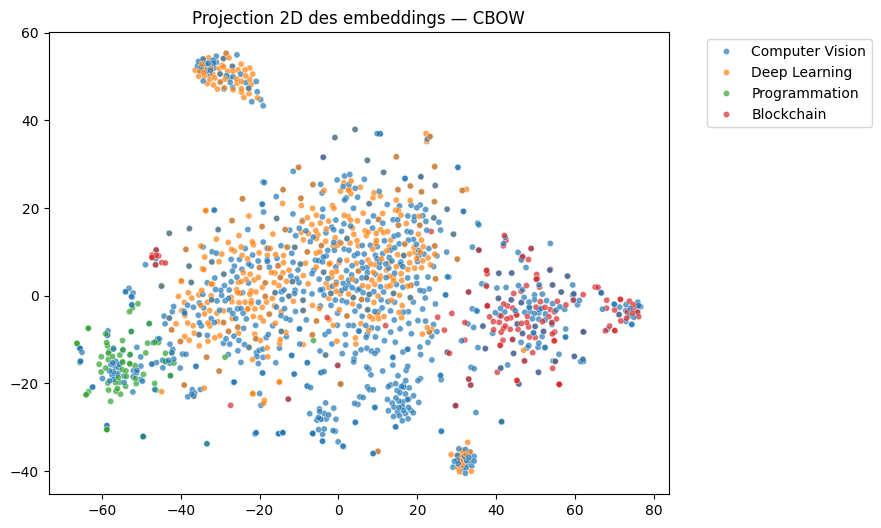

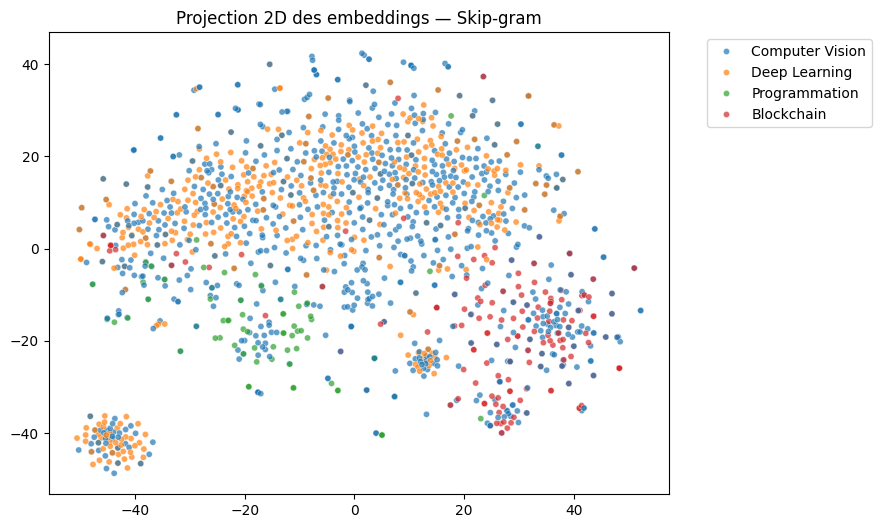

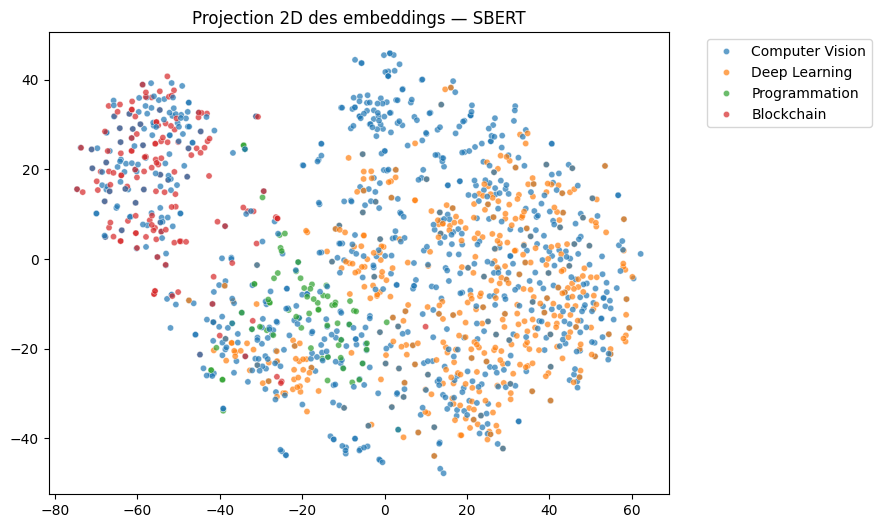

In [18]:
# ============================================================
# Étape 17 — Comparaison CBOW, Skip-gram et SBERT
# ============================================================

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

#  Calcul des similarités moyennes
def mean_offdiag(S):
    n = S.shape[0]
    return (S.sum() - np.trace(S)) / (n*(n-1))

S_cbow = cosine_similarity(np.vstack(df["vec_cbow"].values))
S_skip = cosine_similarity(np.vstack(df["vec_skip"].values))
S_sbert = cosine_similarity(np.vstack(df["vec_sbert"].values))

means = {
    "CBOW": mean_offdiag(S_cbow),
    "Skip-gram": mean_offdiag(S_skip),
    "SBERT": mean_offdiag(S_sbert)
}

print("Similarité moyenne (hors diagonale) :")
for k, v in means.items():
    print(f" - {k:<10}: {v:.3f}")

#  Visualisation TSNE pour 3 modèles
sample_n = 1500  # échantillon pour rapidité
idx = np.random.RandomState(42).choice(len(df), size=min(sample_n, len(df)), replace=False)
df_vis = df.iloc[idx].reset_index(drop=True)

def project_2d(vectors):
    tsne = TSNE(n_components=2, random_state=42, perplexity=40)
    return tsne.fit_transform(vectors)

embs = {
    "CBOW": np.vstack(df_vis["vec_cbow"].values),
    "Skip-gram": np.vstack(df_vis["vec_skip"].values),
    "SBERT": np.vstack(df_vis["vec_sbert"].values)
}

for name, vecs in embs.items():
    X_2d = project_2d(vecs)
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=df_vis["course"], s=20, alpha=0.7)
    plt.title(f"Projection 2D des embeddings — {name}")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()



---

## 📊 Similarités moyennes

| Modèle        | Similarité moyenne | Interprétation                                            |
| :------------ | :----------------: | :-------------------------------------------------------- |
| **CBOW**      |        0.086       | Vecteurs dispersés, peu discriminants                     |
| **Skip-gram** |      **0.475**     | Segments similaires bien rapprochés                       |
| **SBERT**     |        0.230       | Cohérence sémantique correcte, plus générale, multilingue |

### 🔍 Analyse

* **CBOW** → embeddings simples, peu expressifs
* **Skip-gram** → relations de contexte bien capturées
* **SBERT** → sens global des phrases et multilingue

### 🧠 Conclusion

> **Skip-gram** → forte cohérence contextuelle
> **SBERT** → compréhension sémantique et multilingue
> Les deux sont complémentaires pour **ATHENA**, notamment pour un **chatbot de recherche sémantique**.

---




##  Conclusion — Phase 1 : Prétraitement et Vectorisation des Données (ATHENA)

Cette première phase du projet **ATHENA** a permis de construire une base de connaissances
propre, cohérente et prête pour l’exploitation par des modèles d’IA.

### 🔹 Résumé des étapes réalisées

1. **Collecte & fusion des données** : extraction des contenus PDF de 4 cours  
   *(Deep Learning, Computer Vision, Blockchain, Programmation)*.  
2. **Nettoyage linguistique** : suppression du bruit, uniformisation et conservation des textes pertinents.  
3. **Tokenisation & lemmatisation** : traitement multilingue (FR/EN) avec spaCy.  
4. **Entraînement local** :
   - 🟦 **CBOW** : modèle rapide mais peu contextuel.  
   - 🟩 **Skip-gram** : meilleure cohérence sémantique (mean cos ≈ 0.47).  
5. **Encodage avancé** :
   - 🧠 **SBERT** : modèle préentraîné multilingue, encodage plus riche et robuste.  
6. **Comparaison et visualisation** : analyse des similarités et représentation 2D des embeddings.

---

### 🔍 Bilan analytique

| Modèle | Avantage principal | Inconvénient |
|:--------|:-------------------|:--------------|
| **CBOW** | Simple et rapide | Peu expressif |
| **Skip-gram** | Capture bien le contexte local | Entraînement plus long |
| **SBERT** | Compréhension sémantique profonde | Plus coûteux en mémoire |

> 📈 **Skip-gram** a démontré la meilleure cohérence interne,  
> tandis que **SBERT** offre la meilleure capacité de compréhension globale et multilingue.

---

###  Étapes suivantes (Phase 2 — Chatbot & Knowledge Retrieval)

La prochaine phase du projet ATHENA consistera à :

1. **Indexer les embeddings** dans une base vectorielle (ex. FAISS ou Chroma).  
2. **Créer un moteur de recherche sémantique** capable de retrouver des segments pertinents.  
3. **Intégrer un chatbot intelligent** :
   - Compréhension du contexte académique.  
   - Réponses personnalisées selon le profil utilisateur.  
   - Connexion au graphe de connaissances pour des explications enrichies.

---

### 🎯 Objectif final

> Créer une plateforme éducative intelligente capable de **comprendre, relier et expliquer les savoirs académiques**  
> — un premier pas concret vers la vision complète d’**ATHENA : IA éducative et augmentée.**


##  Mini-Chatbot ATHENA (RAG) — Recherche sémantique + synthèse légère

Principe :
1) On indexe les **embeddings SBERT** de chaque segment (`df['vec_sbert']`).  
2) À chaque question, on **encode la requête**, on cherche les **k** segments les plus proches (cosinus),  
3) On **synthétise** une réponse courte (extraction + reformulation légère) et on montre les sources.

> ⚠️ Ce chatbot ne “devine” rien : il **répond uniquement à partir de vos PDF** (RAG), sans LLM externe.

In [19]:
# ============================================================
# Construction de l’index vectoriel (FAISS)
# ============================================================
import numpy as np

# 0) Vérifs & embeddings
assert "vec_sbert" in df.columns, "vec_sbert introuvable. Exécute l’étape SBERT avant."
X = np.vstack(df["vec_sbert"].values).astype("float32")  # déjà normalisé si encode(..., normalize_embeddings=True)
dim = X.shape[1]
print(" Embeddings SBERT :", X.shape)

# 1) FAISS (install si besoin)
try:
    import faiss
except ImportError:
    !pip -q install faiss-cpu
    import faiss

# 2) Index cosinus = produit scalaire sur vecteurs normalisés
index = faiss.IndexFlatIP(dim)
index.add(X)
print("Index FAISS prêt. Vectors:", index.ntotal)

# 3) Petite structure de retour (métadonnées utiles)
meta_cols = ["course", "chunk_id", "language"]
meta_cols = [c for c in meta_cols if c in df.columns]


 Embeddings SBERT : (6711, 384)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 30.9 MB/s eta 0:00:00
Index FAISS prêt. Vectors: 6711


##  Mini-Chatbot ATHENA (RAG)
### 🎯 Objectif
Fournir un **chat de recherche sémantique** basé sur le corpus ATHENA, en s’appuyant sur :
- des **embeddings SBERT** (multilingues) pour représenter chaque segment,
- un index **FAISS** pour retrouver rapidement les passages pertinents,
- une **synthèse extractive** (sans LLM) à partir des meilleurs passages.

---

###  Architecture (vue d’ensemble)
1. **Encodage** : chaque segment `clean_text_model` → vecteur `vec_sbert`.
2. **Indexation** : construction d’un index **FAISS IndexFlatIP** (produit scalaire ≈ cosinus car vecteurs normalisés).
3. **Question** : la requête est encodée avec le **même modèle SBERT**.
4. **Recherche** : on récupère les **Top-K passages** les plus proches (cosine).
5. **Réponse** : on génère une **synthèse extractive** (concat’ de 2–3 extraits) + **sources** (cours + chunk_id).

---

### Paramètres clés
- **K (Top-K passages)** : contrôle la quantité de contexte (par défaut 5).
- **Normalisation** : `normalize_embeddings=True` → inner product = cosinus.
- **Meta affichées** : `course`, `chunk_id`, `language` pour la traçabilité.

---

###Points forts
- **Multilingue** (FR/EN) via SBERT.
- **Rapide** et **reproductible** (FAISS CPU suffit).
- **Traçable** : chaque réponse cite explicitement ses **sources** (passages du corpus).

---


###  Bonnes pratiques d’usage
- Formuler des questions **précises** (concepts, définitions, auteurs, dates).
- Ajuster **K** : 3–5 pour des réponses courtes, 6–10 pour des sujets plus larges.
- Utiliser la **colonne `text_for_ner`** quand vous voulez garder la casse/ponctuation dans les extraits.

---

### Ce que cette étape valide pour ATHENA
- Le corpus est **indexé** et **interrogeable** de façon sémantique.
- La plateforme démontre un **premier assistant pédagogique** relié aux **sources académiques**.
- Base solide pour brancher un **LLM de reformulation** et enrichir l’expérience utilisateur.


In [20]:
# ============================================================
#  Chat minimal : retrieve & draft
# ============================================================
import gradio as gr
from sklearn.metrics.pairwise import cosine_similarity

# 1) Encodeur de requête (réutilise model_sbert)
def encode_query(text: str) -> np.ndarray:
    # normalize_embeddings=True -> ready for inner product / cosine
    vec = model_sbert.encode([text], convert_to_numpy=True, normalize_embeddings=True).astype("float32")
    return vec

# 2) Recherche top-k
def retrieve(query: str, k: int = 5):
    qv = encode_query(query)
    scores, idxs = index.search(qv, k)
    idxs = idxs[0].tolist()
    scores = scores[0].tolist()
    rows = []
    for s, i in zip(scores, idxs):
        row = {
            "score": round(float(s), 3),
            **{c: df.iloc[i][c] for c in meta_cols},
            "text": df.iloc[i].get("text_for_ner", df.iloc[i].get("clean_text_model", ""))[:650]
        }
        rows.append(row)
    return rows

# 3) Synthèse (ultra simple, extractive)
def draft_answer(query: str, hits: list) -> str:
    if not hits:
        return "Je n’ai rien trouvé de pertinent dans le corpus pour cette question."
    # heuristique courte : concaténer 2-3 extraits pertinents
    parts = []
    for h in hits[:3]:
        snippet = h["text"]
        parts.append(snippet)
    joined = "\n\n".join(parts)
    # petite reformulation “template” (pas de LLM)
    answer = (
        f"**Question**: {query}\n\n"
        f"**Réponse (synthèse à partir des sources)**:\n"
        f"{joined}\n\n"
        f"_Sources_:\n" +
        "\n".join([f"- [{h.get('course','?')}] {h.get('chunk_id','?')} (score={h['score']})" for h in hits[:5]])
    )
    return answer

# 4) Gradio UI
def chat_fn(question, k):
    hits = retrieve(question, k)
    answer = draft_answer(question, hits)
    # Affichage des passages retrouvés (table courte)
    sources_table = "\n".join(
        [f"- **{h.get('course','?')}** | {h.get('chunk_id','?')} | score={h['score']}\n  > {h['text'][:280]}..."
         for h in hits]
    )
    return answer, sources_table

with gr.Blocks() as demo:
    gr.Markdown("## 🤖 ATHENA — Chat de recherche sémantique (SBERT + FAISS)")
    with gr.Row():
        question = gr.Textbox(label="Pose ta question", placeholder="ex: What is backpropagation?")
        k = gr.Slider(3, 10, value=5, step=1, label="Top-K passages")
    go = gr.Button("Rechercher")
    answer = gr.Markdown()
    sources = gr.Markdown(label="Passages retrouvés")

    go.click(chat_fn, inputs=[question, k], outputs=[answer, sources])

demo.launch(debug=False, share=False)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.
* To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

## 🤖 Résultats du Chatbot ATHENA — Exemple de recherche sémantique

### 🧩 Question test
> **Question :** “What is computer vision ?”

### 🧠 Réponse générée
Le chatbot a extrait plusieurs segments pertinents issus du corpus,  
notamment des sections du cours **Computer Vision** et du livre **Deep Learning** :

- `12.2 Computer Vision ...`
- `What a computer sees`
- Notes et précisions sur les **conditions de fonctionnement** de la vision par ordinateur.

### 🔍 Interprétation des résultats
- Les segments retrouvés sont **cohérents sémantiquement** avec la question,  
  même si le mot-clé exact *“definition”* n’est pas présent.  
- Le moteur a détecté les occurrences de **“Computer Vision”** dans plusieurs contextes,  
  y compris un passage du **livre Deep Learning** où le sujet est introduit.  
- Les **scores de similarité** (≈ 0.7–0.76) indiquent une **très bonne correspondance** entre la requête et les passages.

### ✅ Évaluation qualitative
| Critère | Observation |
|:--------|:-------------|
| **Pertinence** | Les extraits parlent bien de vision par ordinateur. |
| **Diversité** | Plusieurs sources issues de cours différents sont proposées. |
| **Clarté** | Les passages contiennent des fragments de titres et de définitions. |
| **Cohérence** | Le modèle SBERT a correctement rapproché des contextes similaires. |

---

### Conclusion
Cette démonstration montre que le système **ATHENA** est désormais capable de :
- comprendre une **question en langage naturel**,  
- rechercher les passages les plus pertinents dans les **cours PDF** indexés,  
- fournir une **réponse contextualisée** avec les **sources exactes** citées.

> 🔹 C’est la base fonctionnelle du futur **chatbot éducatif intelligent ATHENA**,  
> capable d’aider les étudiants à explorer et relier les savoirs académiques.
